In [6]:
import os
import sqlite3
import pandas as pd

# Path to the main folder containing subfolders with databases
main_folder = 'data/dev/dev_databases'

# List all subfolders in the main folder
databases = [d for d in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, d))]

# Initialize a list to store the results
results = []

# Loop through each database subfolder
for db_name in databases:
    db_path = os.path.join(main_folder, db_name, f"{db_name}.sqlite")
    
    # Check if the SQLite file exists
    if os.path.exists(db_path):
        # Connect to the SQLite database
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        
        # Get the list of tables
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        num_tables = len(tables)
        
        # Initialize the count of columns
        num_columns = 0
        
        # Loop through each table to count columns
        for table in tables:
            table_name = table[0]
            cursor.execute(f"PRAGMA table_info(\"{table_name}\");")
            columns = cursor.fetchall()
            num_columns += len(columns)
        
        # Add the results to the list
        results.append({
            'Database': db_name,
            'Number of Tables': num_tables,
            'Number of Columns': num_columns
        })
        
        # Close the connection
        conn.close()

# Convert the results to a DataFrame and display it
df_results = pd.DataFrame(results)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_results)

                   Database  Number of Tables  Number of Columns
0   debit_card_specializing                 6                 23
1                 financial                 8                 55
2                 formula_1                14                 96
3        california_schools                 3                 89
4                card_games                 7                117
5       european_football_2                 8                201
6     thrombosis_prediction                 3                 64
7                toxicology                 4                 11
8              student_club                 8                 48
9                 superhero                10                 31
10       codebase_community                 8                 71


In [7]:

# List all subfolders in the main folder
databases = [d for d in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, d))]

# Initialize a list to store the results
results = []

# Loop through each database subfolder
for db_name in databases:
    db_path = os.path.join(main_folder, db_name, f"{db_name}.sqlite")
    
    # Check if the SQLite file exists
    if os.path.exists(db_path):
        # Connect to the SQLite database
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        
        # Get the list of tables, excluding 'sqlite_sequence'
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name != 'sqlite_sequence';")
        tables = cursor.fetchall()
        num_tables = len(tables)
        
        # Initialize the count of columns
        num_columns = 0
        
        # Loop through each table to count columns
        for table in tables:
            table_name = table[0]
            cursor.execute(f"PRAGMA table_info(\"{table_name}\");")
            columns = cursor.fetchall()
            num_columns += len(columns)
        
        # Add the results to the list
        results.append({
            'Database': db_name,
            'Number of Tables': num_tables,
            'Number of Columns': num_columns
        })
        
        # Close the connection
        conn.close()

# Convert the results to a DataFrame
df = pd.DataFrame(results)

# Calculate totals
total_tables = df['Number of Tables'].sum()
total_columns = df['Number of Columns'].sum()

# Append the totals row to the DataFrame
totals_row = pd.DataFrame([['Total', total_tables, total_columns]], columns=df.columns)
df_with_totals = pd.concat([df, totals_row], ignore_index=True)

# Convert to LaTeX table with totals
latex_table_with_totals = df_with_totals.to_latex(index=False)

# Print LaTeX table
print(latex_table_with_totals)

\begin{tabular}{lrr}
\toprule
Database & Number of Tables & Number of Columns \\
\midrule
debit_card_specializing & 5 & 21 \\
financial & 8 & 55 \\
formula_1 & 13 & 94 \\
california_schools & 3 & 89 \\
card_games & 6 & 115 \\
european_football_2 & 7 & 199 \\
thrombosis_prediction & 3 & 64 \\
toxicology & 4 & 11 \\
student_club & 8 & 48 \\
superhero & 10 & 31 \\
codebase_community & 8 & 71 \\
Total & 75 & 798 \\
\bottomrule
\end{tabular}



In [9]:
import pandas as pd

# Path to the Excel file
file_path = 'annotations/Difficulty Annotation.xlsx'

# Read the specific sheet from the Excel file
df = pd.read_excel(file_path, sheet_name='Sammanställning')

# Group by database_name and Final difficulty, and count occurrences
difficulty_counts = df.groupby(['database_name', 'Final difficulty']).size().unstack(fill_value=0)



difficulty_counts


Final difficulty,Easy,Hard,Medium,Very Hard
database_name,,,,
california_schools,24,30,32,3
card_games,37,50,28,0
codebase_community,62,5,4,0
debit_card_specializing,17,1,3,0
european_football_2,34,103,62,0
financial,21,11,9,13
formula_1,49,10,35,0
student_club,39,0,9,0
superhero,30,0,1,0


In [128]:
import pandas as pd

# Path to the Excel file
file_path = 'annotations/Corrected_GOLD_BIRD_Annotations.xlsx'

# Read the sheets for each annotator
df_axel = pd.read_excel(file_path, sheet_name='Axel GOLD')
df_erik = pd.read_excel(file_path, sheet_name='Erik GOLD')

# Define all quality classes
quality_classes = ["No description", "I can't tell", "Incorrect", "Somewhat correct", "Almost Perfect", "Perfect"]

# Calculate the percentage of each quality class for Axel
axel_counts = df_axel['Annotation'].value_counts(normalize=True) * 100
axel_counts = axel_counts.reindex(quality_classes).fillna(0)

# Calculate the percentage of each quality class for Erik
erik_counts = df_erik['Annotation'].value_counts(normalize=True) * 100
erik_counts = erik_counts.reindex(quality_classes).fillna(0)

# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({
    'Annotator 1': axel_counts,
    'Annotator 2': erik_counts
})


# Calculate the mean percentage for each quality class
combined_counts['Mean Percentage'] = combined_counts.mean(axis=1)


combined_counts


,Annotator 1,Annotator 2,Mean Percentage
Annotation,,,
No description,3.258145,2.882206,3.070175
I can't tell,5.513784,9.022556,7.268170
Incorrect,0.125313,0.000000,0.062657
Somewhat correct,13.784461,23.809524,18.796992
Almost Perfect,0.000000,0.000000,0.000000
Perfect,77.318296,64.285714,70.802005


In [36]:
import pandas as pd

# Load the Excel file
file_path = 'annotations/LLM Prediction Annotations(11).xlsx'
sheets = ['Forsberg', 'Oscar']

# Read the sheets into separate dataframes
df_hjalmar = pd.read_excel(file_path, sheet_name=sheets[0])
df_sorme = pd.read_excel(file_path, sheet_name=sheets[1])

# Extract the annotation columns
annotations_hjalmar = df_hjalmar['Annotation LLM 3']
annotations_sorme = df_sorme['Annotation LLM 3']

# Calculate the mean number of annotations in each class
mean_annotations_hjalmar = annotations_hjalmar.value_counts(normalize=True)
mean_annotations_sorme = annotations_sorme.value_counts(normalize=True)

# Combine the means into a single dataframe
mean_annotations = pd.concat([mean_annotations_hjalmar, mean_annotations_sorme], axis=1)
mean_annotations.columns = ['Forsberg', 'Oscar']

# Calculate the overall percentage between the classes
overall_percentage = mean_annotations.mean(axis=1) * 100

# Display the results
mean_annotations, overall_percentage


(                     Forsberg     Oscar
 Annotation LLM 3                       
 4. Perfect           0.775689  0.723058
 No description       0.068922  0.068922
 3. Almost perfect    0.062657  0.100251
 2. Somewhat correct  0.050125  0.072682
 1. Incorrect         0.042607  0.035088,
 Annotation LLM 3
 4. Perfect             74.937343
 No description          6.892231
 3. Almost perfect       8.145363
 2. Somewhat correct     6.140351
 1. Incorrect            3.884712
 dtype: float64)

In [3]:
import pandas as pd

data = pd.read_excel('annotations/LLM Prediction Annotations(13).xlsx', sheet_name="Scores 456")

# Filter the relevant columns
data_filtered = data[['Annotation 1 LLM 6', 'Annotation 2 LLM 6', 'Final difficulty']]

# Convert the annotations to numeric values
annotation_mapping = {
    "4. Perfect": 4,
    "3. Almost perfect": 3,
    "2. Somewhat correct": 2,
    "1. Incorrect": 1
}

data_filtered['Annotation 1 LLM 1'] = data_filtered['Annotation 1 LLM 6'].map(annotation_mapping)
data_filtered['Annotation 2 LLM 1'] = data_filtered['Annotation 2 LLM 6'].map(annotation_mapping)

# Calculate the average annotation per difficulty
data_filtered['Average Quality'] = data_filtered[['Annotation 1 LLM 1', 'Annotation 2 LLM 1']].mean(axis=1)

# Group by difficulty and calculate the mean quality
difficulty_quality = data_filtered.groupby('Final difficulty')['Average Quality'].mean().reset_index()

latex_table = difficulty_quality.to_latex(index=False)

# Display the LaTeX table code
print(latex_table)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

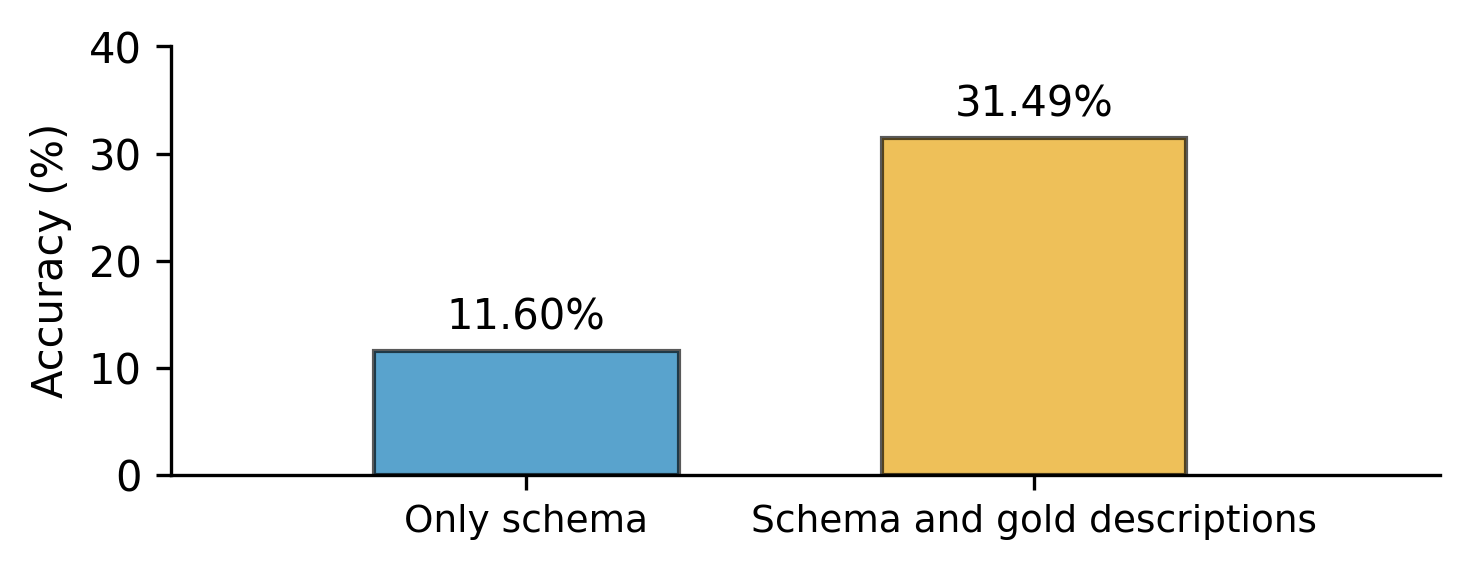

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 300

colors = ['#0072B2', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#D55E00']

# Data for the new plot
data_new = {
    'Only schema': [11.60],
    'Schema and gold descriptions': [31.49]
}

df_new = pd.DataFrame(data_new, index=['Execution accuracy'])

# Creating the bar plot with accuracy numbers displayed on top of each bar and added spacing
fig, ax = plt.subplots(figsize=(5, 2))

# Adding spacing between bars by using width and positions
bar_width = 0.6
bar_positions = [i + 0.7 for i in range(len(df_new.columns))]  # Center the bars

bars = ax.bar(bar_positions, df_new.loc['Execution accuracy'], width=bar_width, color=colors, alpha=0.65, edgecolor="black")
# ax.set_title('Execution accuracy')
ax.set_ylim([0, 40])
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_new.columns, rotation=0, ha="center", fontsize=9)  # Making text below the bars smaller

# Adding the accuracy number on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Adding space to the right and left of the bars
ax.set_xlim([0, len(df_new.columns) + 0.5])


# Removing the "black box" around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()


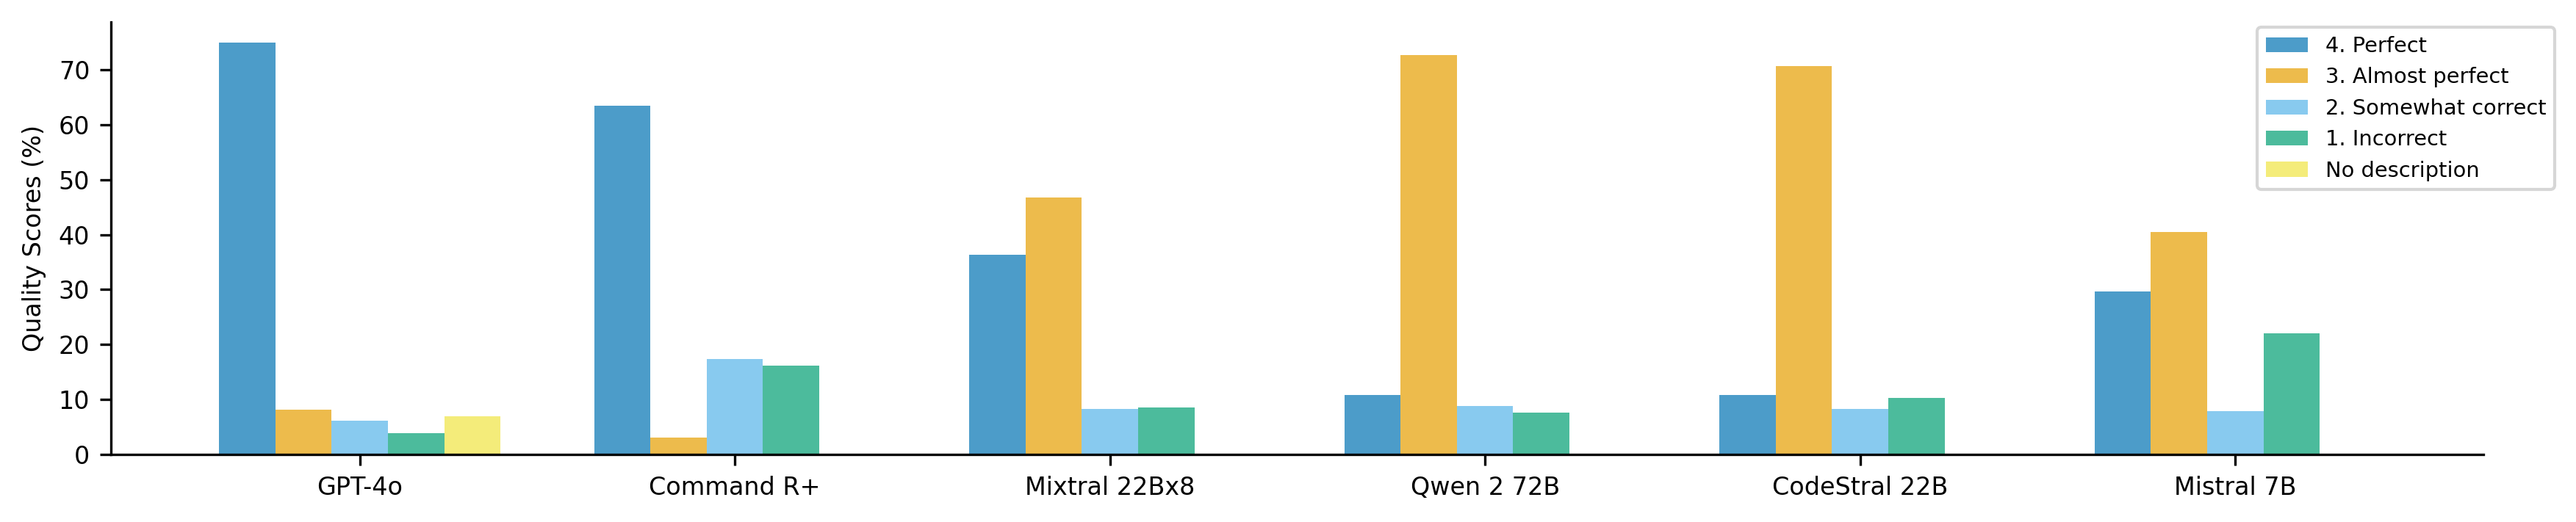

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['figure.dpi'] = 300

# Reorganize data for the new plot structure
GPT_4o = [74.94, 8.15, 6.14, 3.88, 6.89]
Command_R_plus = [63.47, 3.07, 17.29, 16.17, 0]
Qwen_2_72B = [10.85, 72.67, 8.84, 7.65, 0]
CodeStral_22B = [10.84, 70.68, 8.27, 10.21, 0]
Mixtral_22Bx8 = [36.34, 46.80, 8.27, 8.58, 0]
Mistral_7B = [29.65, 40.44, 7.90, 22.01, 0]


# Convert data to numpy array for easier handling
data = np.array([GPT_4o, Command_R_plus, Mixtral_22Bx8, Qwen_2_72B, CodeStral_22B, Mistral_7B])
models = ["GPT-4o", "Command R+", "Mixtral 22Bx8", "Qwen 2 72B", "CodeStral 22B", "Mistral 7B"]


qualities = ["4. Perfect", "3. Almost perfect", "2. Somewhat correct", "1. Incorrect", "No description"]
data_transposed = data.T  # Transpose the data to switch rows and columns


x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

# Color palette suitable for colorblind individuals
# colors = ['#88CCEE', '#44AA99', '#117733', '#DDCC77', '#CC6677']
colors = ['#0072B2', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#D55E00', '#CC79A7']
alpha_value = 0.7

fig, ax = plt.subplots(figsize=(12, 2.5))
rects1 = ax.bar(x - 2*width, data_transposed[0], width, label='4. Perfect', color=colors[0], alpha=alpha_value)
rects2 = ax.bar(x - width, data_transposed[1], width, label='3. Almost perfect', color=colors[1], alpha=alpha_value)
rects3 = ax.bar(x, data_transposed[2], width, label='2. Somewhat correct', color=colors[2], alpha=alpha_value)
rects4 = ax.bar(x + width, data_transposed[3], width, label='1. Incorrect', color=colors[3], alpha=alpha_value)
rects5 = ax.bar(x + 2*width, data_transposed[4], width, label='No description', color=colors[4], alpha=alpha_value)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_xlabel('LLMs')
ax.set_ylabel('Quality Scores (%)')
# ax.set_title('Annotation Scores of Multiple LLMs in Their Ability to Generate Column Descriptions')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.8), fontsize='x-small')

# # Set background color
# ax.set_facecolor('#f0f0f0')
# fig.patch.set_facecolor('#f0f0f0')
# Set background color only inside the axes
# ax.set_facecolor('#d9d9d9')

fig.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set font sizes
ax.tick_params(axis='x', labelsize=8)  # X-ticks font size
ax.tick_params(axis='y', labelsize=8)  # Y-ticks font size
ax.yaxis.label.set_size(8)  # Y-axis label font size

plt.show()


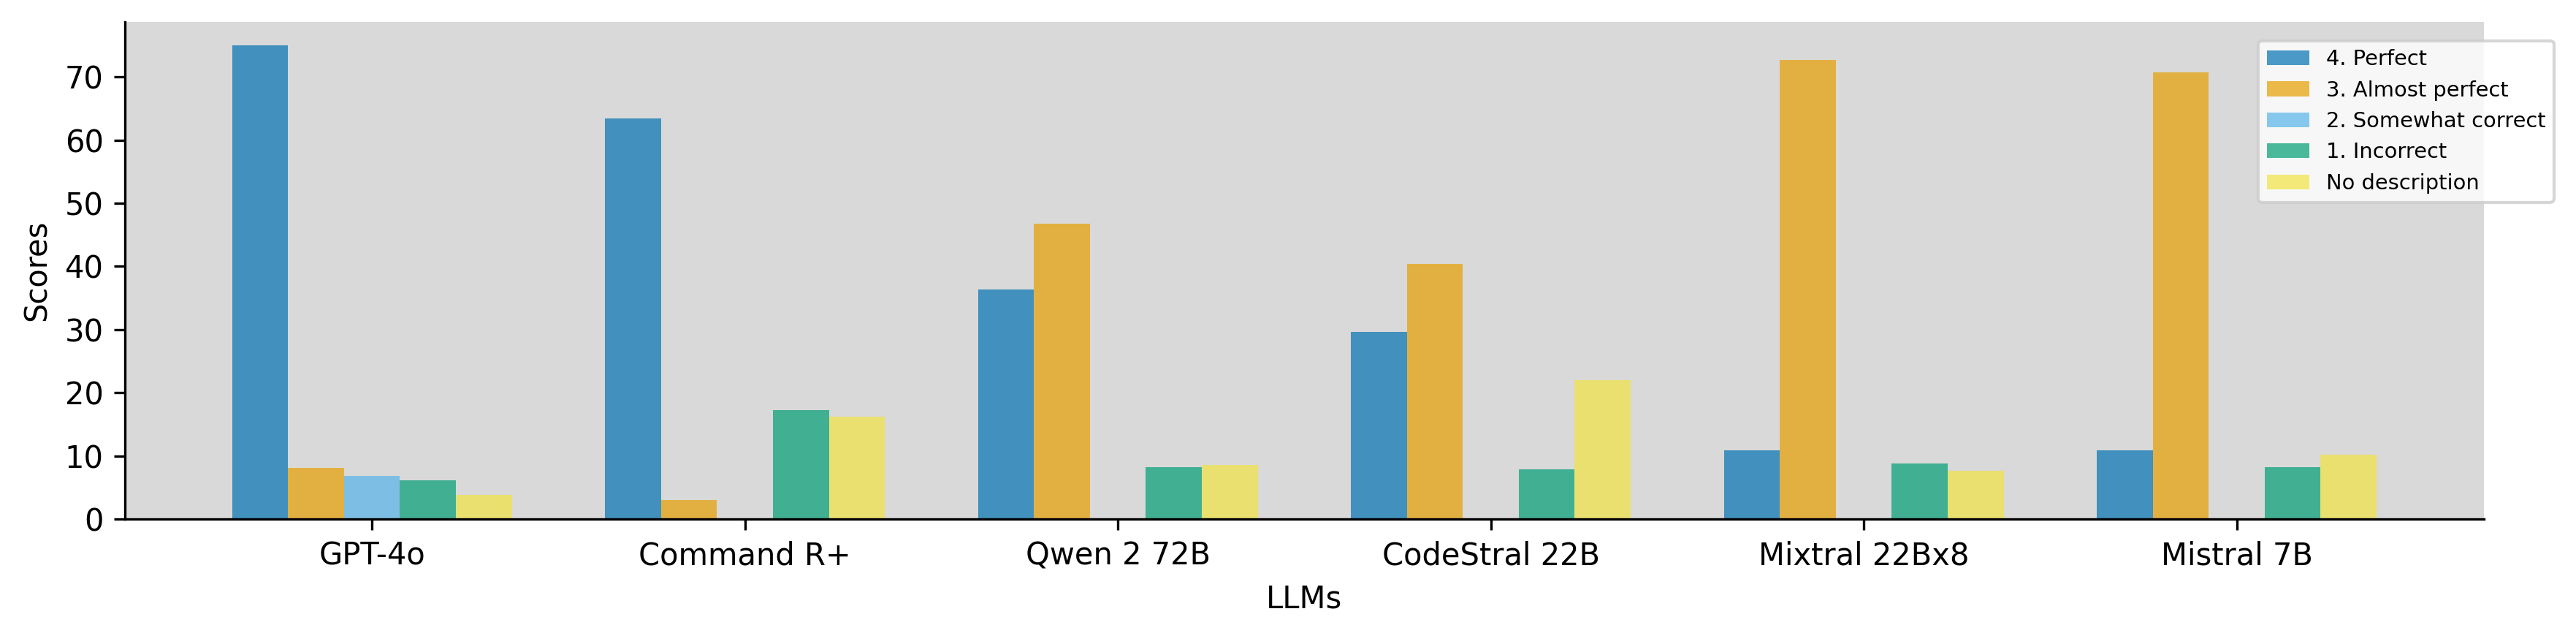

In [157]:
# Define the new order of the models
new_order = [0, 1, 4, 5, 2, 3]
reordered_data = data[:, [0, 1, 4, 2, 3, 2]]
reordered_models = ["GPT-4o", "Command R+", "Qwen 2 72B", "CodeStral 22B", "Mixtral 22Bx8", "Mistral 7B"]

# Reorganize data for the new plot structure
data_transposed = reordered_data.T  # Transpose the data to switch rows and columns

x = np.arange(len(reordered_models))  # the label locations
width = 0.15  # the width of the bars

# Color palette suitable for colorblind individuals with alpha for transparency
colors = ['#0072B2', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#D55E00']
alpha_value = 0.7  # Set alpha for transparency

fig, ax = plt.subplots(figsize=(12, 3))
rects1 = ax.bar(x - 2*width, data_transposed[0], width, label='4. Perfect', color=colors[0], alpha=alpha_value)
rects2 = ax.bar(x - width, data_transposed[1], width, label='3. Almost perfect', color=colors[1], alpha=alpha_value)
rects3 = ax.bar(x, data_transposed[2], width, label='2. Somewhat correct', color=colors[2], alpha=alpha_value)
rects4 = ax.bar(x + width, data_transposed[3], width, label='1. Incorrect', color=colors[3], alpha=alpha_value)
rects5 = ax.bar(x + 2*width, data_transposed[4], width, label='No description', color=colors[4], alpha=alpha_value)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('LLMs')
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(reordered_models)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.8), fontsize='x-small')

# Set background color only inside the axes to a darker grey
ax.set_facecolor('#d9d9d9')

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

plt.show()


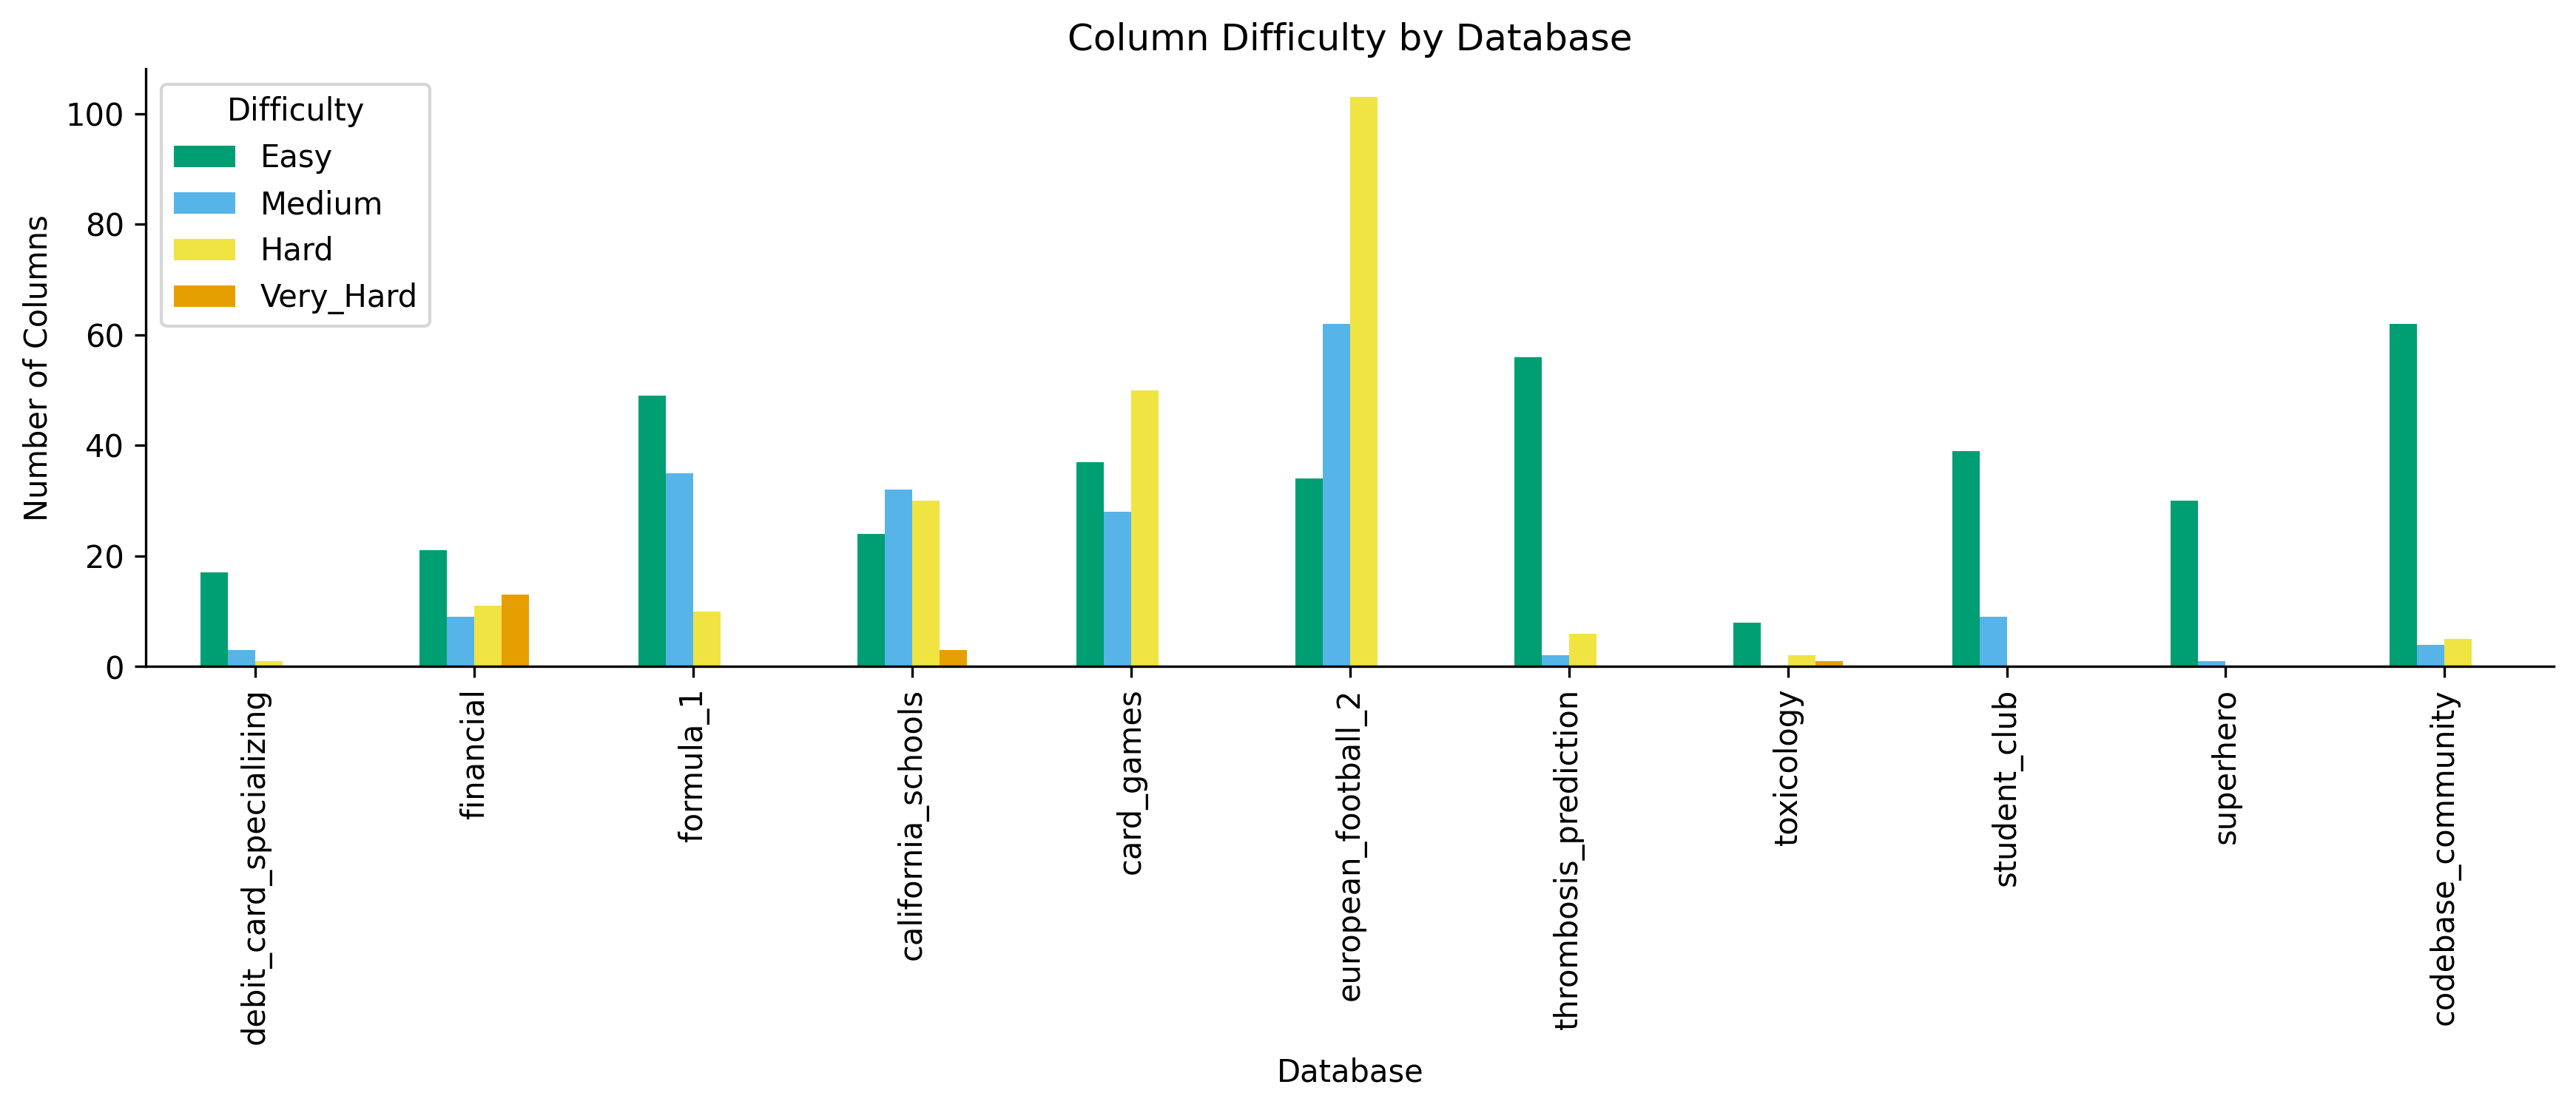

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

# Sample Data
data = {
    'Database': ['debit_card_specializing', 'financial', 'formula_1', 'california_schools', 
                 'card_games', 'european_football_2', 'thrombosis_prediction', 
                 'toxicology', 'student_club', 'superhero', 'codebase_community'],
    'No_of_Tables': [5, 8, 13, 3, 6, 7, 3, 4, 8, 10, 8],
    'No_of_Columns': [21, 55, 94, 89, 115, 199, 64, 11, 48, 31, 71],
    'Easy': [17, 21, 49, 24, 37, 34, 56, 8, 39, 30, 62],
    'Medium': [3, 9, 35, 32, 28, 62, 2, 0, 9, 1, 4],
    'Hard': [1, 11, 10, 30, 50, 103, 6, 2, 0, 0, 5],
    'Very_Hard': [0, 13, 0, 3, 0, 0, 0, 1, 0, 0, 0]
}

df = pd.DataFrame(data)


# Colors for the difficulty levels
colors = {
    'Easy': '#009E73', # Bluish Green
    'Medium': '#56B4E9',  # Sky Blue
    'Hard': '#F0E442',  # Yellow 
    'Very_Hard': '#E69F00'  # Orange
}
 
# Bar Chart for Each Database
ax = df.set_index('Database')[['Easy', 'Medium', 'Hard', 'Very_Hard']].plot(kind='bar', stacked=False, figsize=(14, 3.5), color=[colors['Easy'], colors['Medium'], colors['Hard'], colors['Very_Hard']])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Column Difficulty by Database')
plt.xlabel('Database')
plt.ylabel('Number of Columns')
plt.legend(title='Difficulty')
plt.show()



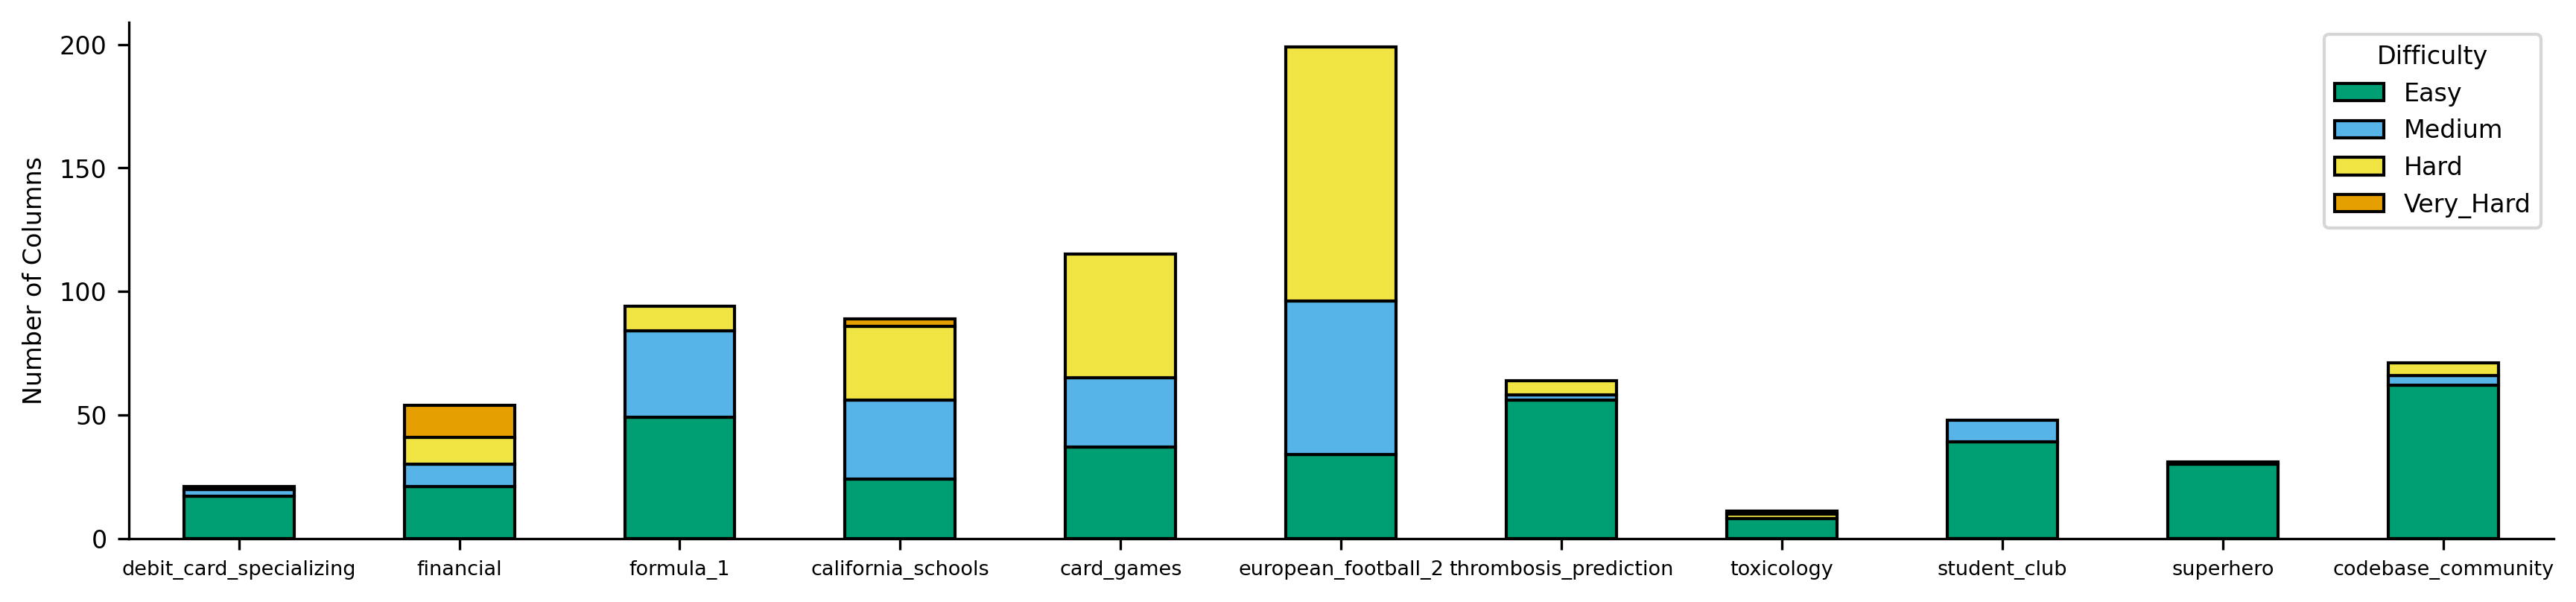

In [14]:
# Stacked Bar Chart
ax = df.set_index('Database')[['Easy', 'Medium', 'Hard', 'Very_Hard']].plot(kind='bar', edgecolor="black", stacked=True, figsize=(14, 3), color=[colors['Easy'], colors['Medium'], colors['Hard'], colors['Very_Hard']])
# plt.title('Stacked Column Difficulty by Database')
# plt.xlabel('Database')
plt.ylabel('Number of Columns', fontsize=8)
plt.xlabel('')
plt.legend(title='Difficulty', fontsize=8, title_fontsize=8)
plt.xticks(rotation=0, fontsize=6.5)
plt.yticks(fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


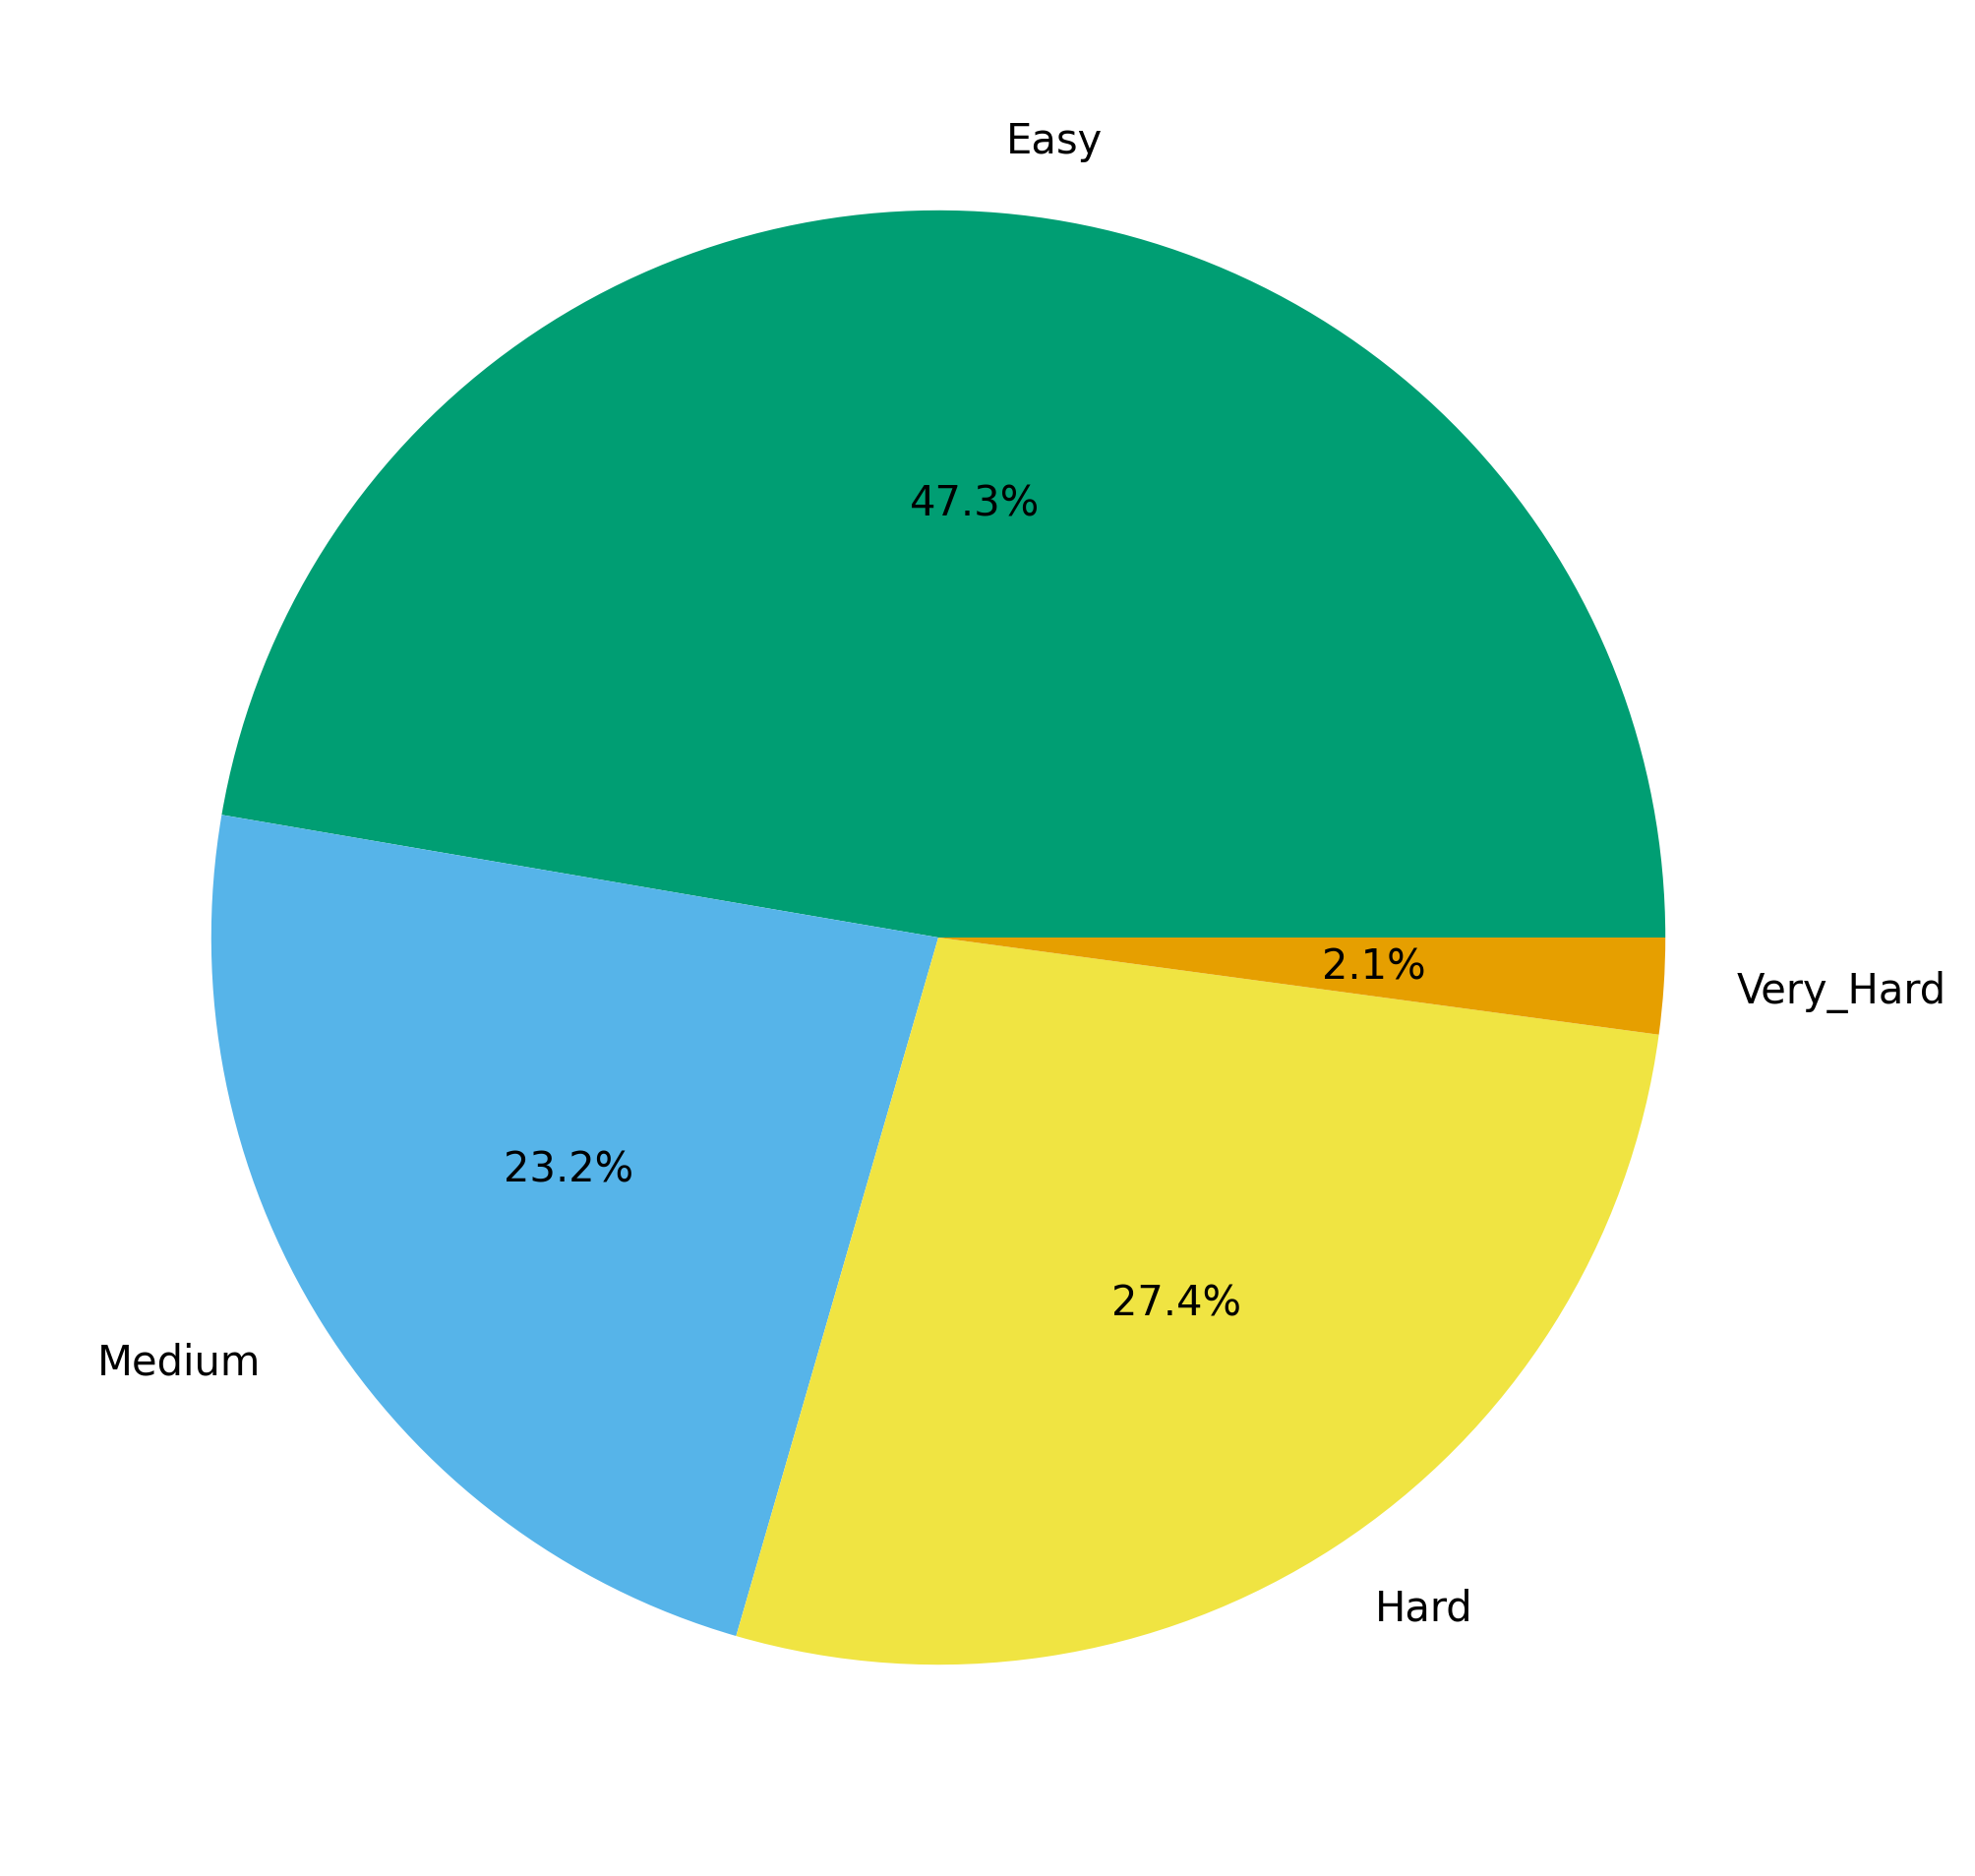

In [53]:
# Pie Chart
total_difficulty = df[['Easy', 'Medium', 'Hard', 'Very_Hard']].sum()
fig, ax = plt.subplots(figsize=(8, 8))
total_difficulty.plot(kind='pie', autopct='%1.1f%%', colors=[colors['Easy'], colors['Medium'], colors['Hard'], colors['Very_Hard']], ax=ax)
# plt.title('Overall Column Difficulty Distribution')
plt.ylabel('')  # Hides the y-label for better presentation
plt.show()


In [ ]:

used_metadata = ['no_metadata', 'gold_metadata', 'best_pred_metadata', 'bird_metadata']
command_r_plus = [0.2320730117340287, 0.2516297262059974, 0.0, 0.24185136897001303]
mistral_7b = [0.14732724902216426, 0.16492829204693613, 0.15384615384615385, 0.15058670143415906]
codestral_22b = [0.2529335071707953, 0.2737940026075619, 0.0, 0.2646675358539765]
qwen2_72b = [0.2894393741851369, 0.3220338983050847, 0.0, 0.3116036505867014]
gpt_4o = [0.3, 0.33, 0.32, 0.31]

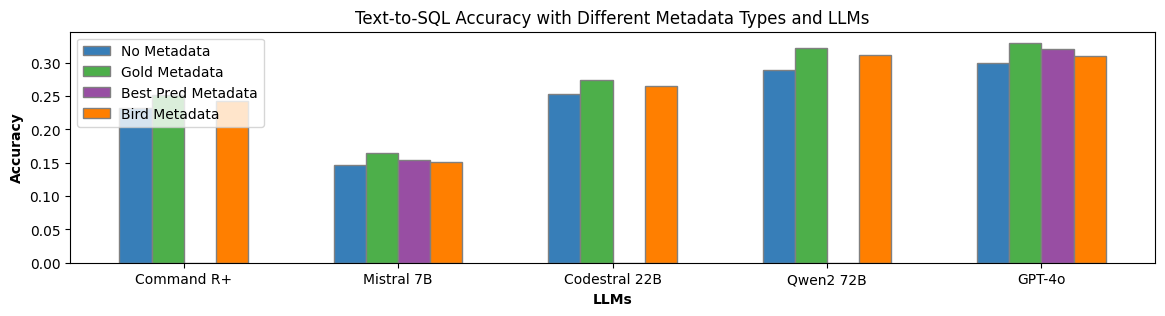

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
llms = ['Command R+', 'Mistral 7B', 'Codestral 22B', 'Qwen2 72B', 'GPT-4o']
no_metadata = [0.2320730117340287, 0.14732724902216426, 0.2529335071707953, 0.2894393741851369, 0.3]
gold_metadata = [0.2516297262059974, 0.16492829204693613, 0.2737940026075619, 0.3220338983050847, 0.33]
best_pred_metadata = [0.0, 0.15384615384615385, 0.0, 0.0, 0.32]
bird_metadata = [0.24185136897001303, 0.15058670143415906, 0.2646675358539765, 0.3116036505867014, 0.31]

# Bar width
bar_width = 0.15

# X positions
r1 = np.arange(len(llms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Colors
colors = ['#377eb8', '#4daf4a', '#984ea3', '#ff7f00']

# Plotting
plt.figure(figsize=(14, 3))

plt.bar(r1, no_metadata, color=colors[0], width=bar_width, edgecolor='grey', label='No Metadata')
plt.bar(r2, gold_metadata, color=colors[1], width=bar_width, edgecolor='grey', label='Gold Metadata')
plt.bar(r3, best_pred_metadata, color=colors[2], width=bar_width, edgecolor='grey', label='Best Pred Metadata')
plt.bar(r4, bird_metadata, color=colors[3], width=bar_width, edgecolor='grey', label='Bird Metadata')

# Adding labels
plt.xlabel('LLMs', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + 1.5*bar_width for r in range(len(llms))], llms)
plt.title('Text-to-SQL Accuracy with Different Metadata Types and LLMs')
plt.legend()

# Show plot
plt.show()


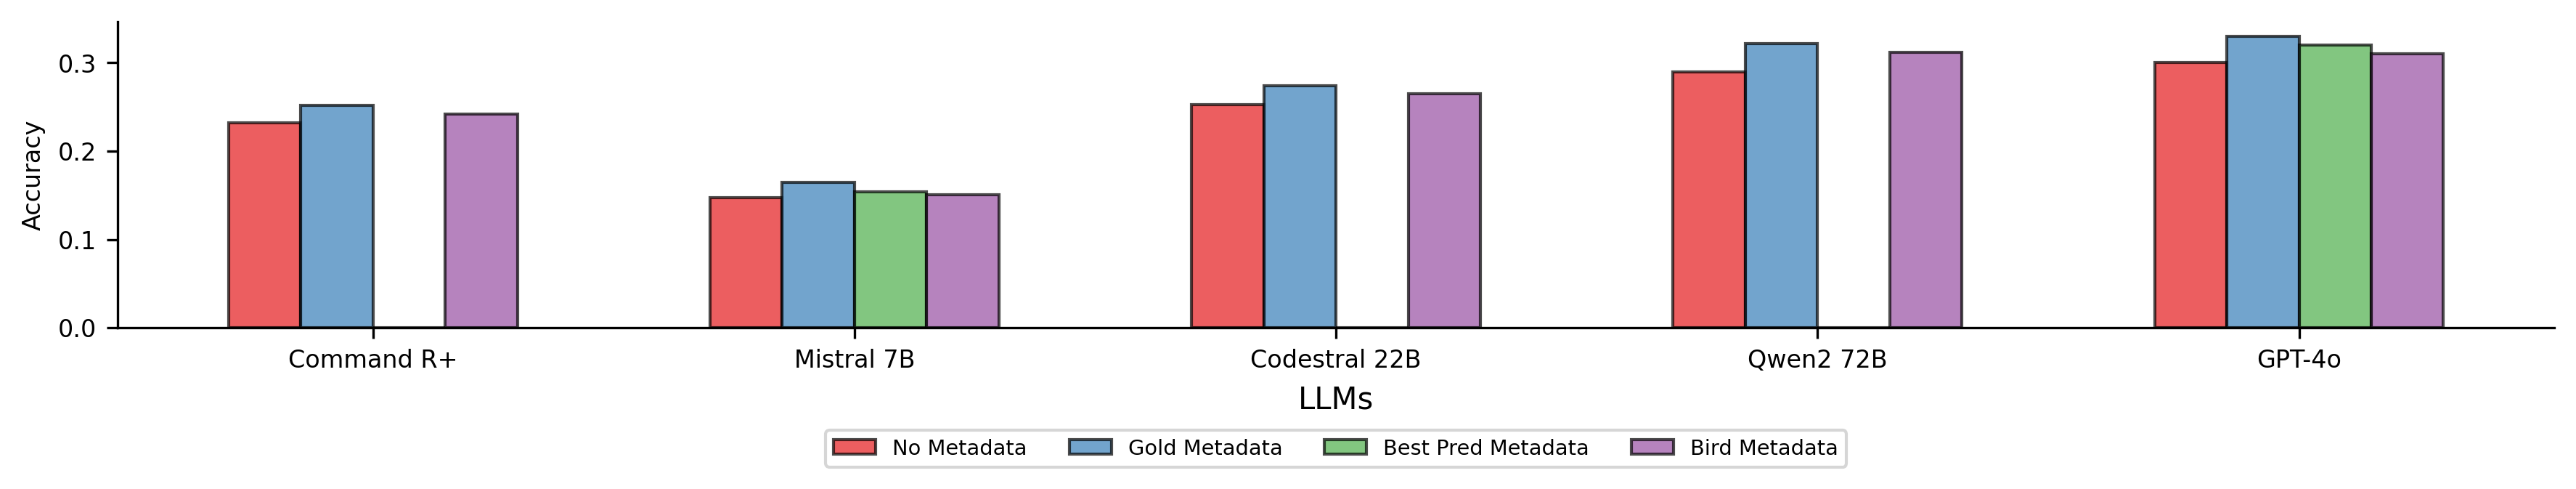

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 300

# Data
llms = ['Command R+', 'Mistral 7B', 'Codestral 22B', 'Qwen2 72B', 'GPT-4o']
no_metadata = [0.2320730117340287, 0.14732724902216426, 0.2529335071707953, 0.2894393741851369, 0.3]
gold_metadata = [0.2516297262059974, 0.16492829204693613, 0.2737940026075619, 0.3220338983050847, 0.33]
best_pred_metadata = [0.0, 0.15384615384615385, 0.0, 0.0, 0.32]
bird_metadata = [0.24185136897001303, 0.15058670143415906, 0.2646675358539765, 0.3116036505867014, 0.31]

# Bar width
bar_width = 0.15

# X positions
r1 = np.arange(len(llms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Colors (new color palette)
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3']

# Plotting
fig, ax = plt.subplots(figsize=(12, 2.5))

# Set transparency
alpha_value = 0.7

plt.bar(r1, no_metadata, color=colors[0], width=bar_width, edgecolor='black', label='No Metadata', alpha=alpha_value)
plt.bar(r2, gold_metadata, color=colors[1], width=bar_width, edgecolor='black', label='Gold Metadata', alpha=alpha_value)
plt.bar(r3, best_pred_metadata, color=colors[2], width=bar_width, edgecolor='black', label='Best Pred Metadata', alpha=alpha_value)
plt.bar(r4, bird_metadata, color=colors[3], width=bar_width, edgecolor='black', label='Bird Metadata', alpha=alpha_value)

# Adding labels and customizing appearance
ax.set_xlabel('LLMs')
ax.set_ylabel('Accuracy')
ax.set_xticks([r + 1.5*bar_width for r in range(len(llms))])
ax.set_xticklabels(llms)

# Position the legend below the plot to avoid overlap
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=4, fontsize='x-small')

# Remove background color and set black borders
ax.set_facecolor('white')

fig.tight_layout()

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set font sizes
ax.tick_params(axis='x', labelsize=8)  # X-ticks font size
ax.tick_params(axis='y', labelsize=8)  # Y-ticks font size
ax.yaxis.label.set_size(8)  # Y-axis label font size

plt.show()


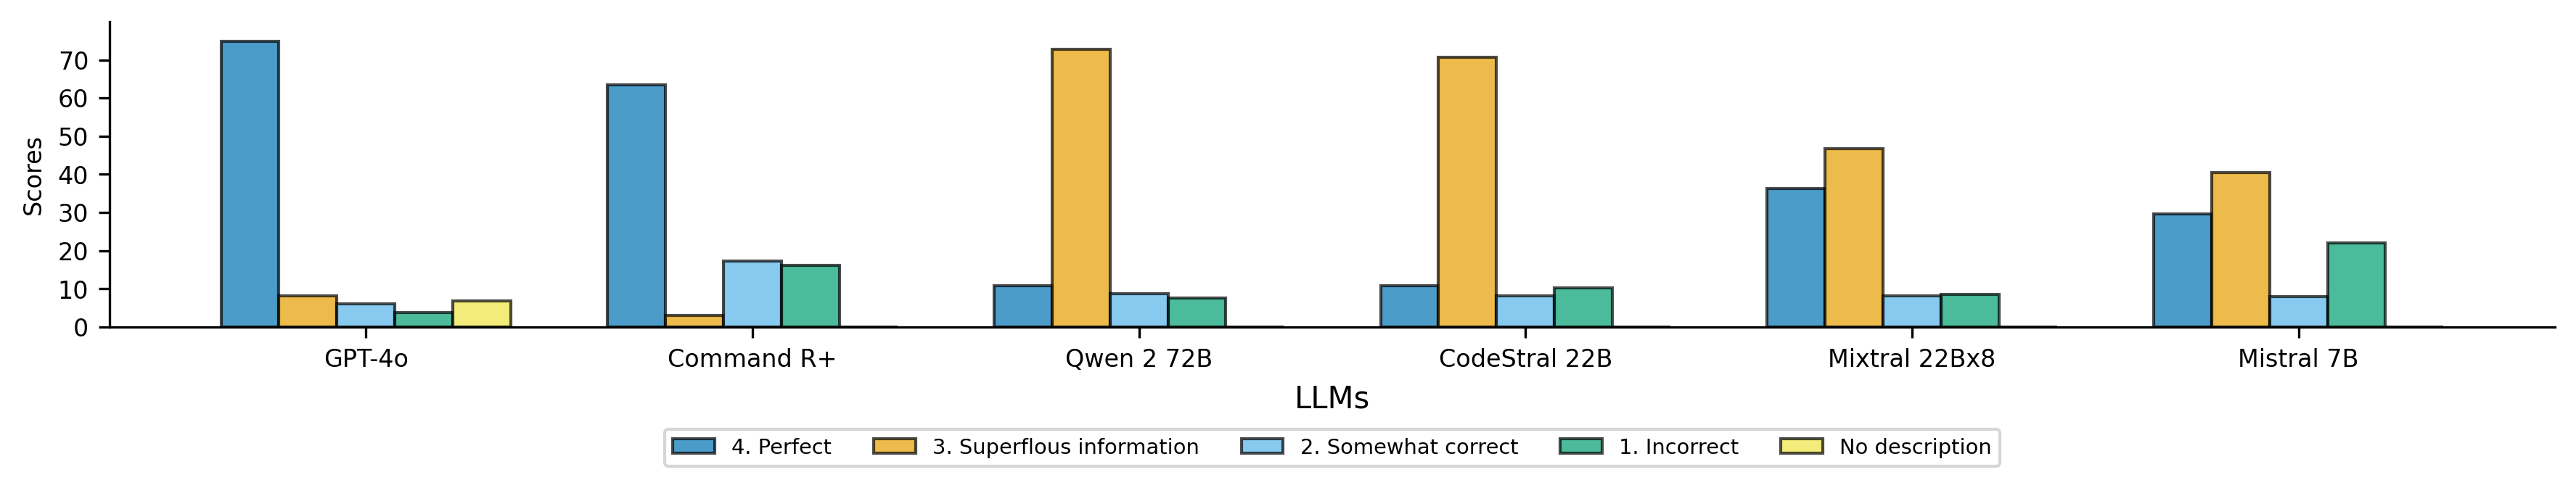

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 300

# Reorganize data for the new plot structure
GPT_4o = [74.94, 8.15, 6.14, 3.88, 6.89]
Command_R_plus = [63.47, 3.07, 17.29, 16.17, 0]
Qwen_2_72B = [10.85, 72.67, 8.84, 7.65, 0]
CodeStral_22B = [10.84, 70.68, 8.27, 10.21, 0]
Mixtral_22Bx8 = [36.34, 46.80, 8.27, 8.58, 0]
Mistral_7B = [29.65, 40.44, 7.90, 22.01, 0]

data = np.array([GPT_4o, Command_R_plus, Qwen_2_72B, CodeStral_22B, Mixtral_22Bx8, Mistral_7B])
models = ["GPT-4o", "Command R+", "Qwen 2 72B", "CodeStral 22B", "Mixtral 22Bx8", "Mistral 7B"]

data_transposed = data.T  # Transpose the data to switch rows and columns

x = np.arange(len(reordered_models))  # the label locations
width = 0.15  # the width of the bars

# Colors (new color palette)
colors = ['#0072B2', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#D55E00']

alpha_value = 0.7  # Set alpha for transparency

fig, ax = plt.subplots(figsize=(12, 2.5))

rects1 = ax.bar(x - 2*width, data_transposed[0], width, label='4. Perfect', color=colors[0], edgecolor='black', alpha=alpha_value)
rects2 = ax.bar(x - width, data_transposed[1], width, label='3. Superflous information', color=colors[1], edgecolor='black', alpha=alpha_value)
rects3 = ax.bar(x, data_transposed[2], width, label='2. Somewhat correct', color=colors[2], edgecolor='black', alpha=alpha_value)
rects4 = ax.bar(x + width, data_transposed[3], width, label='1. Incorrect', color=colors[3], edgecolor='black', alpha=alpha_value)
rects5 = ax.bar(x + 2*width, data_transposed[4], width, label='No description', color=colors[4], edgecolor='black', alpha=alpha_value)

# Adding labels and customizing appearance
ax.set_xlabel('LLMs')
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(reordered_models)

# Extend the y-axis to 70 and add more ticks
ax.set_ylim(0, 80)
ax.set_yticks(np.arange(0, 71, 10))  # Adding ticks at every 10 units

# Position the legend below the plot to avoid overlap
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=5, fontsize='x-small')

# Remove background color and set black borders
ax.set_facecolor('white')

fig.tight_layout()

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set font sizes
ax.tick_params(axis='x', labelsize=8)  # X-ticks font size
ax.tick_params(axis='y', labelsize=8)  # Y-ticks font size
ax.yaxis.label.set_size(8)  # Y-axis label font size

plt.show()


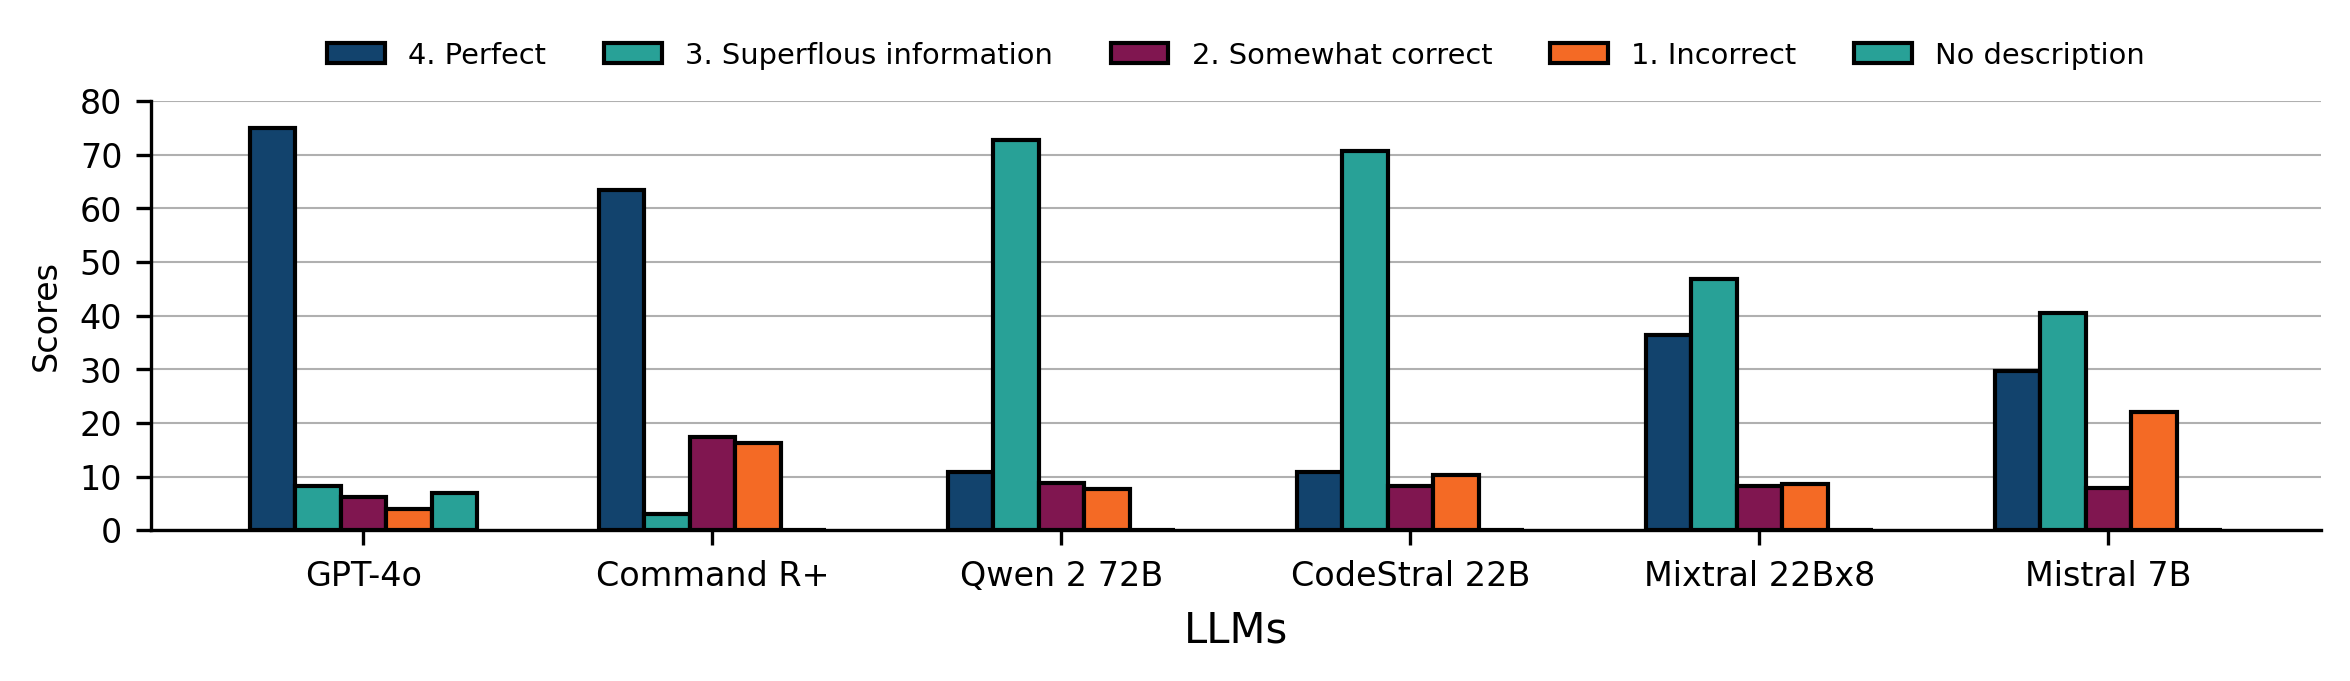

In [52]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 300

# Reorganize data for the new plot structure
GPT_4o = [74.94, 8.15, 6.14, 3.88, 6.89]
Command_R_plus = [63.47, 3.07, 17.29, 16.17, 0]
Qwen_2_72B = [10.85, 72.67, 8.84, 7.65, 0]
CodeStral_22B = [10.84, 70.68, 8.27, 10.21, 0]
Mixtral_22Bx8 = [36.34, 46.80, 8.27, 8.58, 0]
Mistral_7B = [29.65, 40.44, 7.90, 22.01, 0]

# Reorganize data so each model only plots up to the number of non-zero values
data = np.array([GPT_4o, Command_R_plus, Qwen_2_72B, CodeStral_22B, Mixtral_22Bx8, Mistral_7B])
models = ["GPT-4o", "Command R+", "Qwen 2 72B", "CodeStral 22B", "Mixtral 22Bx8", "Mistral 7B"]

data_transposed = data.T  # Transpose the data to switch rows and columns

x = np.arange(len(models))  # the label locations
width = 0.13  # Increase the bar width to remove whitespace

# New colors as specified
colors = ['#12436D', '#28A197', '#801650', '#F46A25']

alpha_value = 1  # Set alpha for transparency

# Adjust the figure size
fig, ax = plt.subplots(figsize=(8, 2.5))

rects1 = ax.bar(x - 2*width, data_transposed[0], width, label='4. Perfect', color=colors[0], edgecolor='black', alpha=alpha_value)
rects2 = ax.bar(x - width, data_transposed[1], width, label='3. Superflous information', color=colors[1], edgecolor='black', alpha=alpha_value)
rects3 = ax.bar(x, data_transposed[2], width, label='2. Somewhat correct', color=colors[2], edgecolor='black', alpha=alpha_value)
rects4 = ax.bar(x + width, data_transposed[3], width, label='1. Incorrect', color=colors[3], edgecolor='black', alpha=alpha_value)
rects5 = ax.bar(x + 2*width, data_transposed[4], width, label='No description', color=colors[1], edgecolor='black', alpha=alpha_value)


# Adding labels and customizing appearance
ax.set_xlabel('LLMs')
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Extend the y-axis to 80 and add more ticks
ax.set_ylim(0, 80)
ax.set_yticks(np.arange(0, 81, 10))  # Adding ticks at every 10 units

# Add solid horizontal grid lines for every 10th point on the y-axis
ax.grid(axis='y', which='both', linestyle='-', linewidth=0.5)

# Ensure grid lines go behind the bars
ax.set_axisbelow(True)

# Position the legend on the top, spanning horizontally
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fontsize='x-small', frameon=False)

# Remove background color and set black borders
ax.set_facecolor('white')

fig.tight_layout()

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set font sizes
ax.tick_params(axis='x', labelsize=8)  # X-ticks font size
ax.tick_params(axis='y', labelsize=8)  # Y-ticks font size
ax.yaxis.label.set_size(8)  # Y-axis label font size

# Add some space between the first bar and the y-axis
ax.margins(x=0.05)  # Increase the left margin slightly to create space

plt.show()


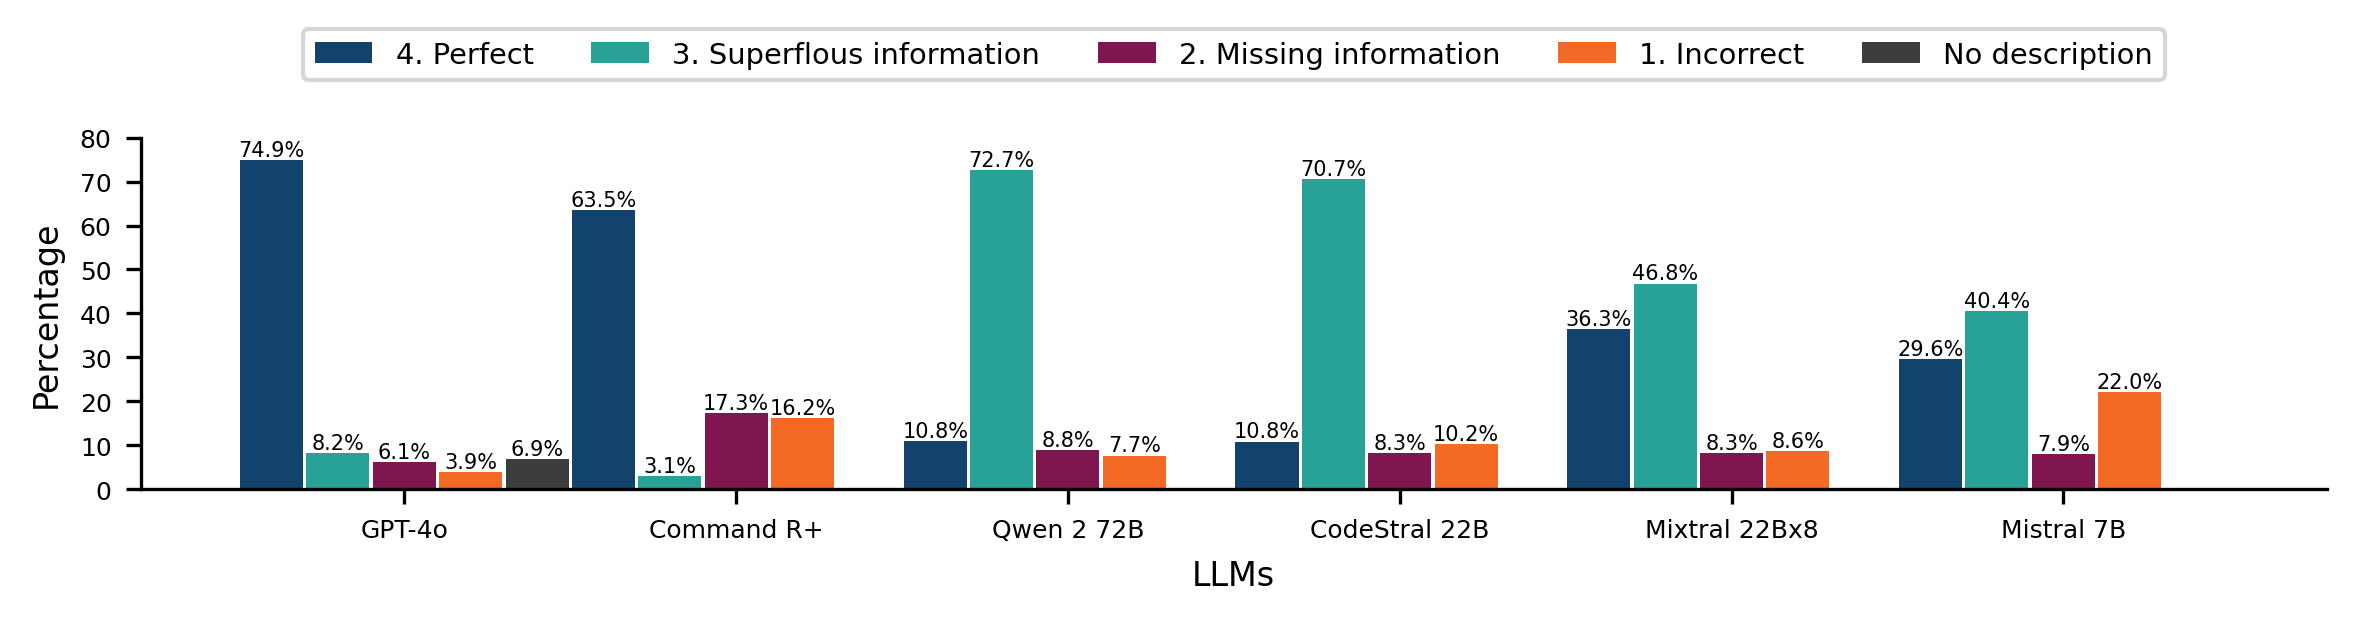

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 300

# Reorganize data for the new plot structure
GPT_4o = [74.94, 8.15, 6.14, 3.88, 6.89]
Command_R_plus = [63.47, 3.07, 17.29, 16.17, 0]
Qwen_2_72B = [10.85, 72.67, 8.84, 7.65, 0]
CodeStral_22B = [10.84, 70.68, 8.27, 10.21, 0]
Mixtral_22Bx8 = [36.34, 46.80, 8.27, 8.58, 0]
Mistral_7B = [29.65, 40.44, 7.90, 22.01, 0]

# Reorganize data so each model only plots up to the number of non-zero values
data = np.array([GPT_4o, Command_R_plus, Qwen_2_72B, CodeStral_22B, Mixtral_22Bx8, Mistral_7B])
models = ["GPT-4o", "Command R+", "Qwen 2 72B", "CodeStral 22B", "Mixtral 22Bx8", "Mistral 7B"]

data_transposed = data.T  # Transpose the data to switch rows and columns

x = np.arange(len(models))  # the label locations
width = 0.19  # Increase the bar width
gap = 0.01  # Add a small gap between bars

# New colors as specified
colors = ['#12436D', '#28A197', '#801650', '#F46A25', '#3D3D3D']

alpha_value = 1  # Set alpha for transparency

# Adjust the figure size and add extra space at the top for the legend
fig, ax = plt.subplots(figsize=(8, 2.5))

# Function to add value labels on top of bars
def add_value_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width()/2., height,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontsize=5)

# Add slight space between bars by adjusting position
rects1 = ax.bar(x - 2*(width+gap), data_transposed[0], width, label='4. Perfect', color=colors[0], alpha=alpha_value)
rects2 = ax.bar(x - (width+gap), data_transposed[1], width, label='3. Superflous information', color=colors[1], alpha=alpha_value)
rects3 = ax.bar(x, data_transposed[2], width, label='2. Missing information', color=colors[2], alpha=alpha_value)
rects4 = ax.bar(x + (width+gap), data_transposed[3], width, label='1. Incorrect', color=colors[3], alpha=alpha_value)
rects5 = ax.bar(x + 2*(width+gap), data_transposed[4], width, label='No description', color=colors[4], alpha=alpha_value)

# Add value labels
add_value_labels(ax, rects1)
add_value_labels(ax, rects2)
add_value_labels(ax, rects3)
add_value_labels(ax, rects4)
add_value_labels(ax, rects5)

# Adding labels and customizing appearance
ax.set_xlabel('LLMs', fontsize=8)
ax.set_ylabel('Percentage', fontsize=6)
ax.set_xticks(x)
ax.set_xticklabels(models)

# Extend the y-axis to 80 and add more ticks
ax.set_ylim(0, 80)
ax.set_yticks(np.arange(0, 81, 10))  # Adding ticks at every 10 units

# Remove grid lines
ax.grid(False)

# Position the legend further up and add a frame without color
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=5, fontsize='x-small', frameon=True)

# Remove background color and set black borders
ax.set_facecolor('white')

fig.tight_layout()

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set font sizes
ax.tick_params(axis='x', labelsize=6)  # X-ticks font size
ax.tick_params(axis='y', labelsize=6)  # Y-ticks font size
ax.yaxis.label.set_size(8)  # Y-axis label font size

# Add some space between the first bar and the y-axis
ax.margins(x=0.05)  # Increase the left margin slightly to create space

plt.show()

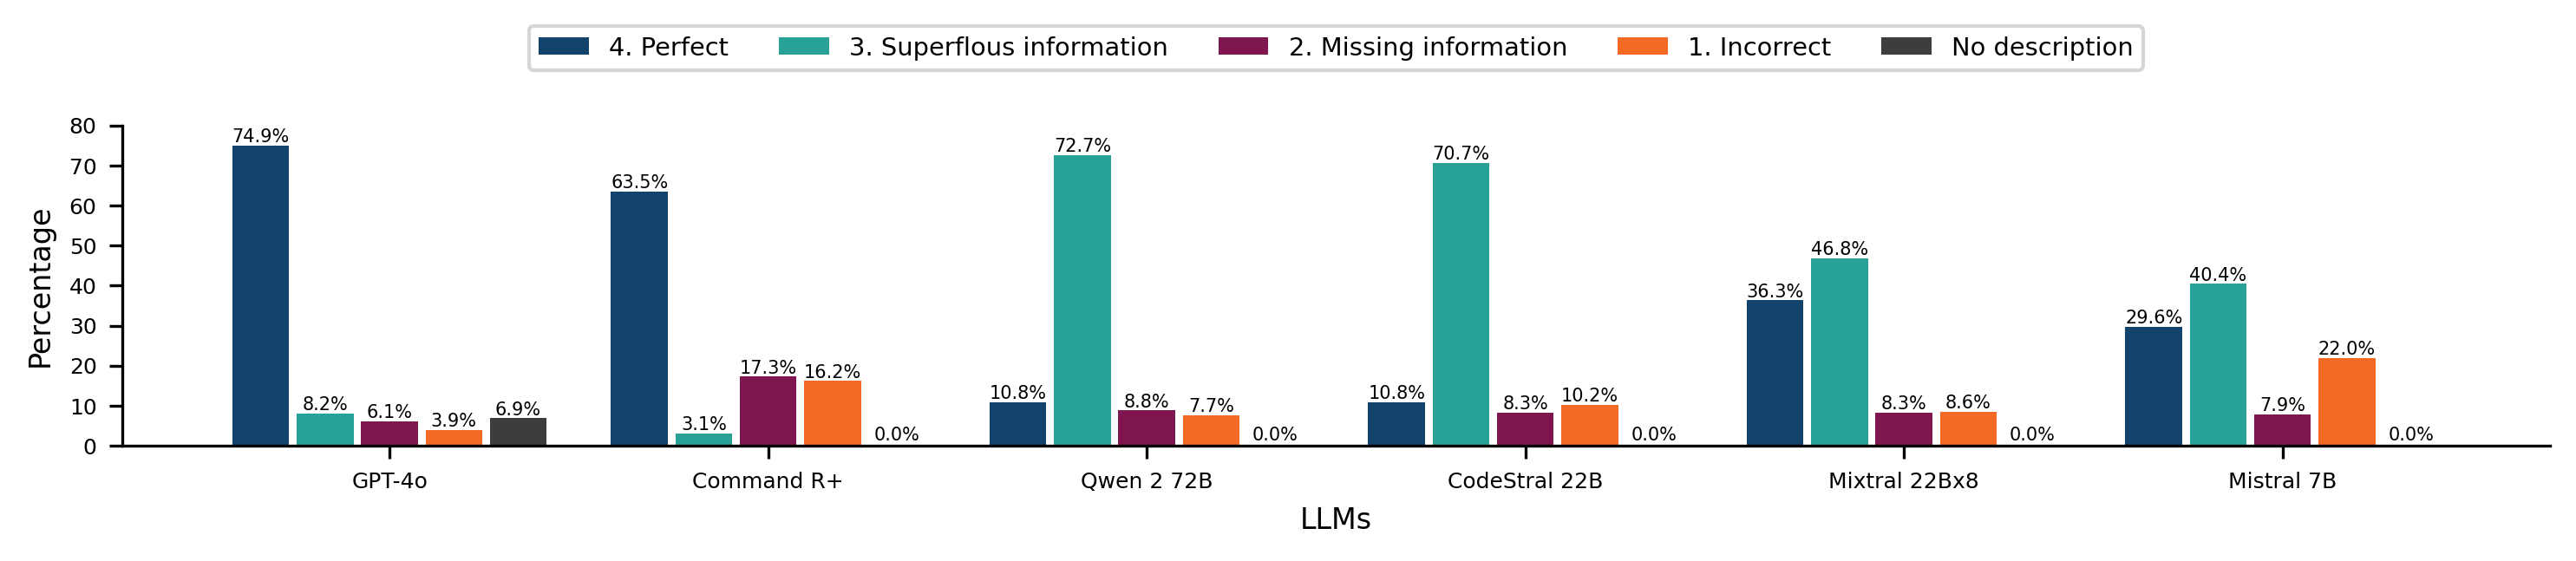

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 300

# Reorganize data for the new plot structure
GPT_4o = [74.94, 8.15, 6.14, 3.88, 6.89]
Command_R_plus = [63.47, 3.07, 17.29, 16.17, 0]
Qwen_2_72B = [10.85, 72.67, 8.84, 7.65, 0]
CodeStral_22B = [10.84, 70.68, 8.27, 10.21, 0]
Mixtral_22Bx8 = [36.34, 46.80, 8.27, 8.58, 0]
Mistral_7B = [29.65, 40.44, 7.90, 22.01, 0]

data = np.array([GPT_4o, Command_R_plus, Qwen_2_72B, CodeStral_22B, Mixtral_22Bx8, Mistral_7B])
models = ["GPT-4o", "Command R+", "Qwen 2 72B", "CodeStral 22B", "Mixtral 22Bx8", "Mistral 7B"]

x = np.arange(len(models))
width = 0.15
gap = 0.02

colors = ['#12436D', '#28A197', '#801650', '#F46A25', '#3D3D3D']

fig, ax = plt.subplots(figsize=(10, 2.5))

def add_value_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width()/2., height,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontsize=5)

labels = ["4. Perfect", "3. Superflous information", "2. Missing information", "1. Incorrect", "No description"]
for i in range(5):  # Plot all 5 categories for all LLMs
    rects = ax.bar(x + (i - 2) * (width + gap), data[:, i], width, label=labels[i], color=colors[i])
    add_value_labels(ax, rects)
    
    # Add 0.0% labels for "No description" where the value is 0
    if i == 4:
        for j, value in enumerate(data[:, i]):
            if value == 0:
                ax.text(x[j] + (i - 2) * (width + gap), 0.5, '0.0%',
                        ha='center', va='bottom', fontsize=5, color='black')

ax.set_xlabel('LLMs', fontsize=8)
ax.set_ylabel('Percentage', fontsize=6)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0, ha='center', fontsize=6)

ax.set_ylim(0, 80)
ax.set_yticks(np.arange(0, 81, 10))

ax.grid(False)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=5, fontsize='x-small', frameon=True)

ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='y', labelsize=6)
ax.yaxis.label.set_size(8)

plt.tight_layout()
plt.show()

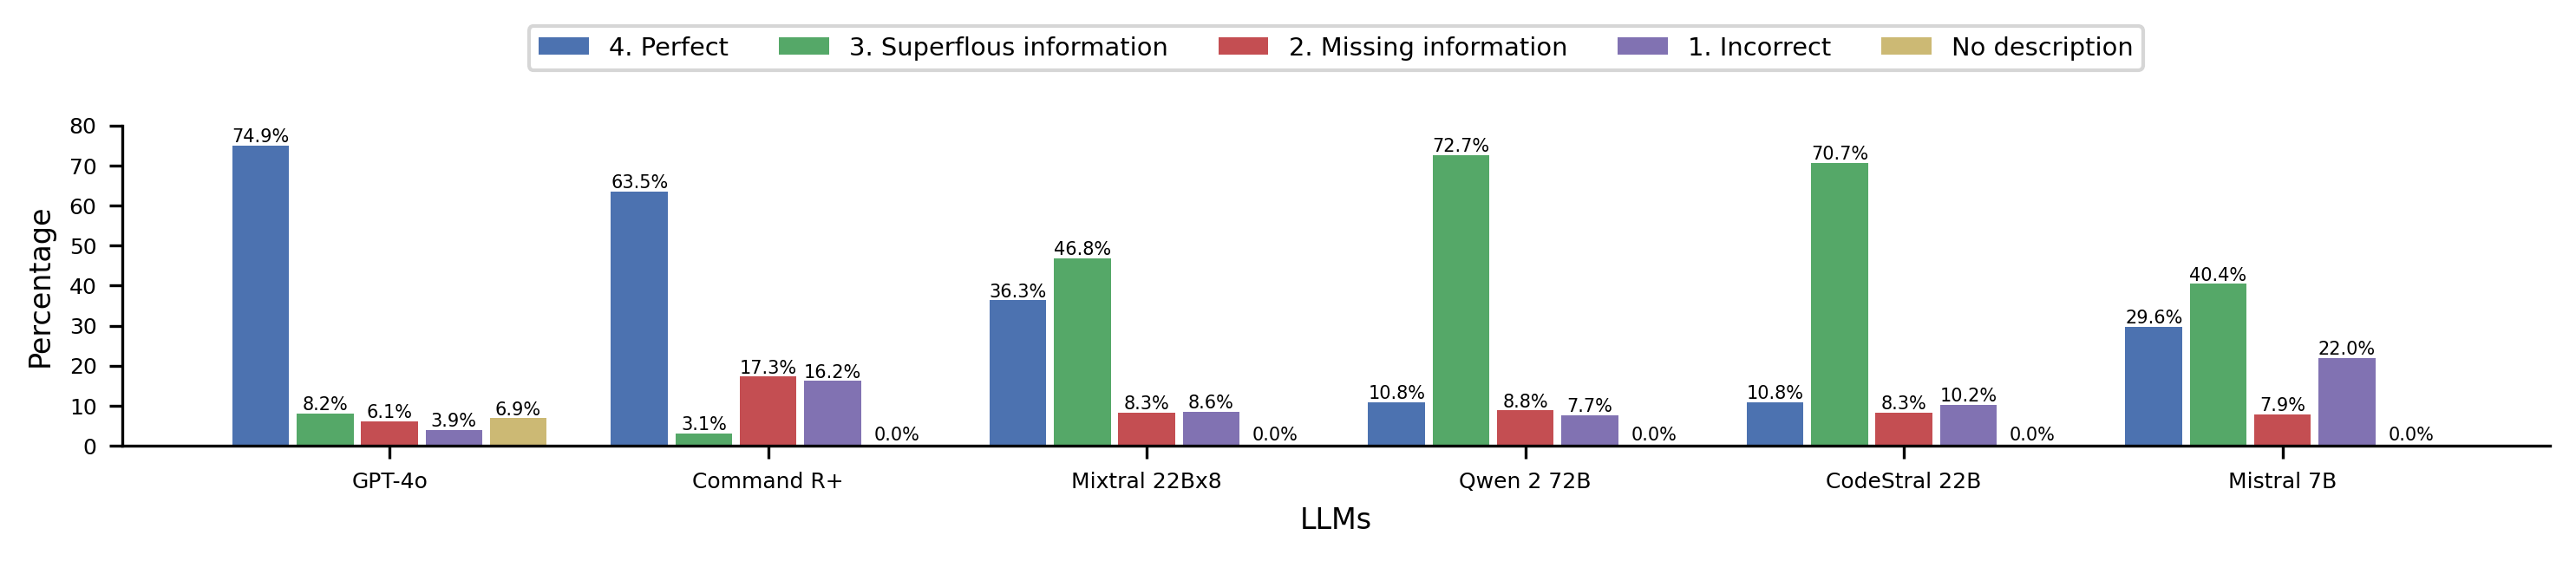

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 300

# Reorganize data for the new plot structure
GPT_4o = [74.94, 8.15, 6.14, 3.88, 6.89]
Command_R_plus = [63.47, 3.07, 17.29, 16.17, 0]
Mixtral_22Bx8 = [36.34, 46.80, 8.27, 8.58, 0]
Qwen_2_72B = [10.85, 72.67, 8.84, 7.65, 0]
CodeStral_22B = [10.84, 70.68, 8.27, 10.21, 0]
Mistral_7B = [29.65, 40.44, 7.90, 22.01, 0]

data = np.array([GPT_4o, Command_R_plus, Mixtral_22Bx8, Qwen_2_72B, CodeStral_22B, Mistral_7B])
models = ["GPT-4o", "Command R+", "Mixtral 22Bx8", "Qwen 2 72B", "CodeStral 22B", "Mistral 7B"]

x = np.arange(len(models))
width = 0.15
gap = 0.02

# New color scheme suitable for research papers
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974']

fig, ax = plt.subplots(figsize=(10, 2.5))

def add_value_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width()/2., height,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontsize=5)

labels = ["4. Perfect", "3. Superflous information", "2. Missing information", "1. Incorrect", "No description"]
for i in range(5):  # Plot all 5 categories for all LLMs
    rects = ax.bar(x + (i - 2) * (width + gap), data[:, i], width, label=labels[i], color=colors[i])
    add_value_labels(ax, rects)
    
    # Add 0.0% labels for "No description" where the value is 0
    if i == 4:
        for j, value in enumerate(data[:, i]):
            if value == 0:
                ax.text(x[j] + (i - 2) * (width + gap), 0.5, '0.0%',
                        ha='center', va='bottom', fontsize=5, color='black')

ax.set_xlabel('LLMs', fontsize=8)
ax.set_ylabel('Percentage', fontsize=6)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0, ha='center', fontsize=6)

ax.set_ylim(0, 80)
ax.set_yticks(np.arange(0, 81, 10))

ax.grid(False)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=5, fontsize='x-small', frameon=True)

ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='y', labelsize=6)
ax.yaxis.label.set_size(8)

plt.tight_layout()
plt.show()

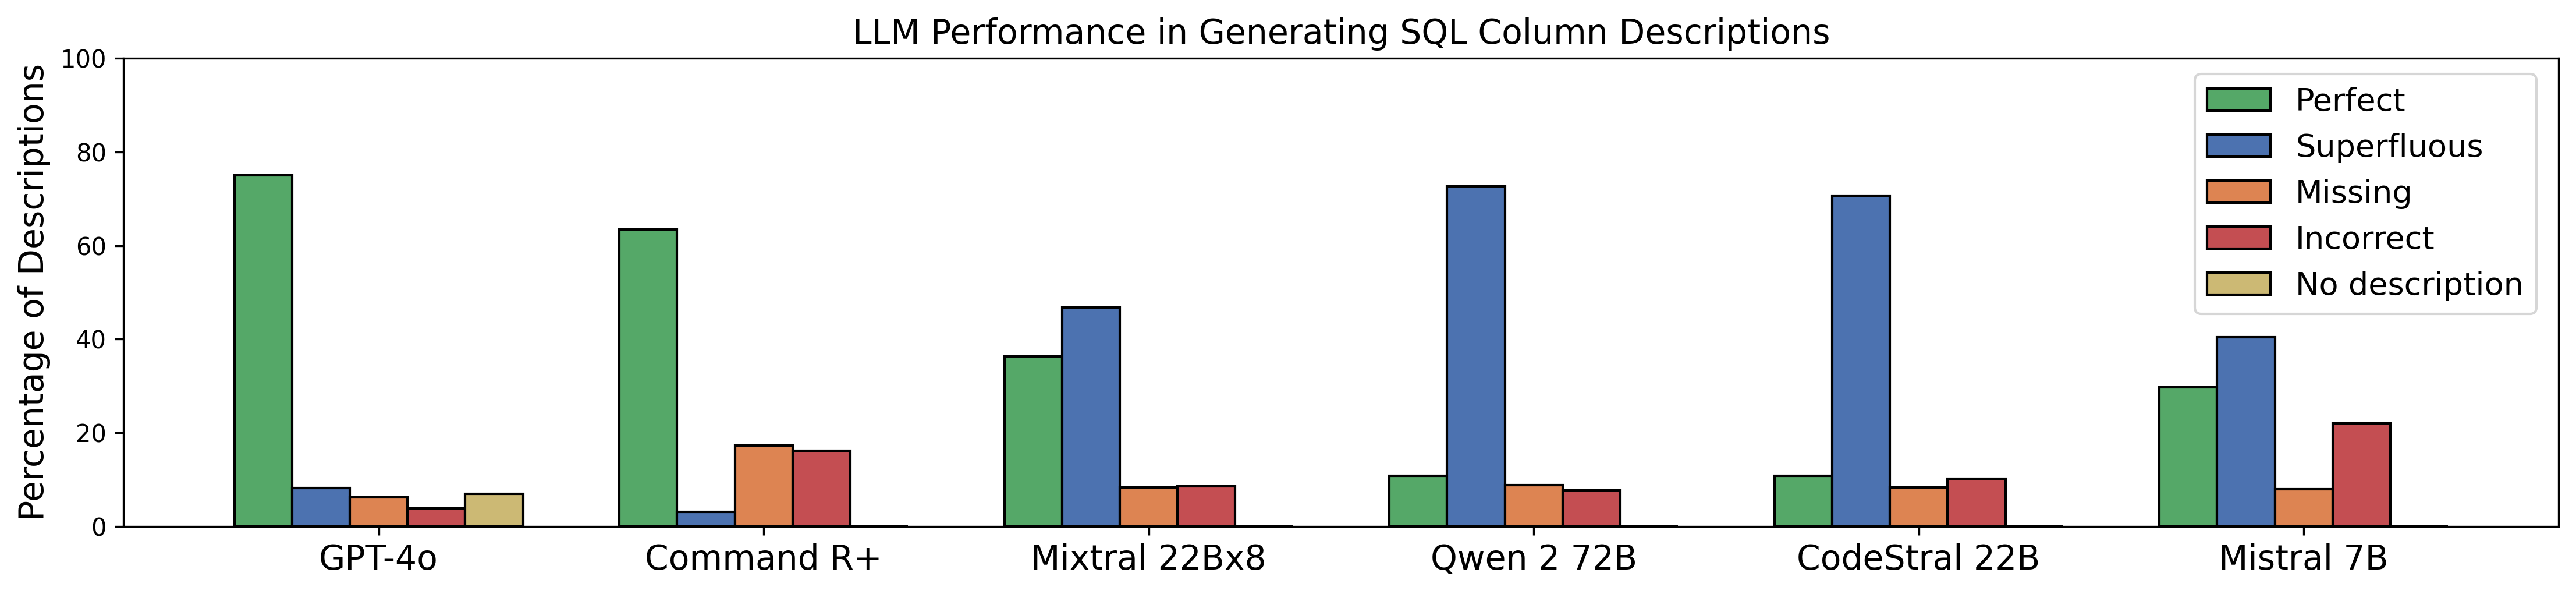

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 300

# Data
models = ['GPT-4o', 'Command R+', 'Mixtral 22Bx8', 'Qwen 2 72B', 'CodeStral 22B', 'Mistral 7B']
perfect = [74.94, 63.47, 36.34, 10.85, 10.84, 29.65]
superfluous = [8.15, 3.07, 46.80, 72.67, 70.68, 40.44]
missing = [6.14, 17.29, 8.27, 8.84, 8.27, 7.90]
incorrect = [3.88, 16.17, 8.58, 7.65, 10.21, 22.01]
no_description = [6.89, 0, 0, 0, 0, 0]

# Updated color scheme
colors = ['#55A868', '#4C72B0', '#DD8452', '#C44E52', '#CCB974']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 3.5))

# Set width of bars
bar_width = 0.15

# Set positions of the bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Create bars
plt.bar(r1, perfect, color=colors[0], width=bar_width, label='Perfect', edgecolor='black')
plt.bar(r2, superfluous, color=colors[1], width=bar_width, label='Superfluous', edgecolor='black')
plt.bar(r3, missing, color=colors[2], width=bar_width, label='Missing', edgecolor='black')
plt.bar(r4, incorrect, color=colors[3], width=bar_width, label='Incorrect', edgecolor='black')
plt.bar(r5, no_description, color=colors[4], width=bar_width, label='No description', edgecolor='black')

# Add xticks on the middle of the group bars
# plt.xlabel('LLMs', fontweight='bold', fontsize=12)
plt.ylabel('Percentage of Descriptions', fontsize=14)
plt.xticks([r + bar_width*2 for r in range(len(models))], models, ha='center', fontsize=14)

# Create legend & title
plt.legend(loc='upper left', bbox_to_anchor=(0.844, 1), fontsize=13)
plt.title('LLM Performance in Generating SQL Column Descriptions', fontsize=14)

# Adjust layout and display
plt.tight_layout()
plt.ylim(0, 100)

# Remove top and right spines
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# Save the chart
plt.savefig('llm_performance_grouped_chart.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

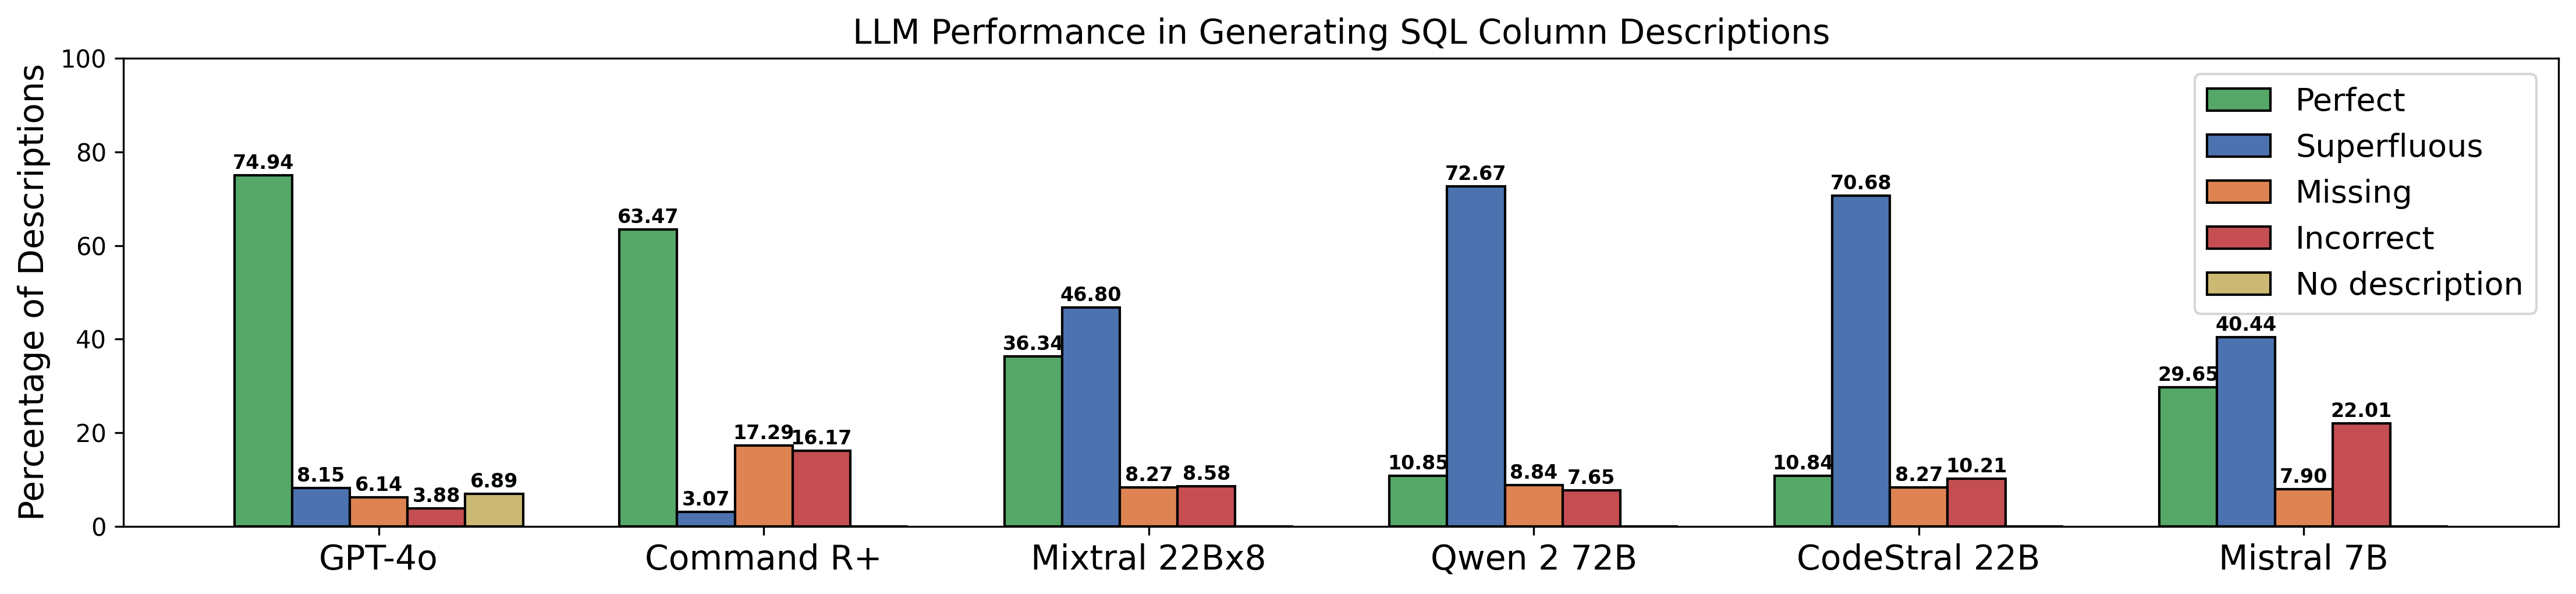

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 300

# Data
models = ['GPT-4o', 'Command R+', 'Mixtral 22Bx8', 'Qwen 2 72B', 'CodeStral 22B', 'Mistral 7B']
perfect = [74.94, 63.47, 36.34, 10.85, 10.84, 29.65]
superfluous = [8.15, 3.07, 46.80, 72.67, 70.68, 40.44]
missing = [6.14, 17.29, 8.27, 8.84, 8.27, 7.90]
incorrect = [3.88, 16.17, 8.58, 7.65, 10.21, 22.01]
no_description = [6.89, 0, 0, 0, 0, 0]

# Updated color scheme
colors = ['#55A868', '#4C72B0', '#DD8452', '#C44E52', '#CCB974']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 3.5))

# Set width of bars
bar_width = 0.15

# Set positions of the bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Create bars and add annotations
bars1 = plt.bar(r1, perfect, color=colors[0], width=bar_width, label='Perfect', edgecolor='black')
bars2 = plt.bar(r2, superfluous, color=colors[1], width=bar_width, label='Superfluous', edgecolor='black')
bars3 = plt.bar(r3, missing, color=colors[2], width=bar_width, label='Missing', edgecolor='black')
bars4 = plt.bar(r4, incorrect, color=colors[3], width=bar_width, label='Incorrect', edgecolor='black')
bars5 = plt.bar(r5, no_description, color=colors[4], width=bar_width, label='No description', edgecolor='black')

# Add annotations on top of bars
for bars in [bars1, bars2, bars3, bars4, bars5]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:  # Only add text if the bar is above 0
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Add xticks on the middle of the group bars
plt.ylabel('Percentage of Descriptions', fontsize=14)
plt.xticks([r + bar_width*2 for r in range(len(models))], models, ha='center', fontsize=14)

# Create legend & title
plt.legend(loc='upper left', bbox_to_anchor=(0.844, 1), fontsize=13)
plt.title('LLM Performance in Generating SQL Column Descriptions', fontsize=14)

# Adjust layout and display
plt.tight_layout()
plt.ylim(0, 100)

# Display the plot
plt.show()


In [2]:
import pandas as pd

excel_data = pd.ExcelFile("annotations/LLM Prediction Annotations.xlsx")

# Load the specific sheet into a DataFrame
axel_df = excel_data.parse('Oscar')

# Filter rows where Annotation is "No Description"
no_description_df = axel_df[axel_df['Annotation LLM 3'] == 'No description']

# Group by Difficulty and count the occurrences
missing_description_counts = no_description_df['Difficulty'].value_counts()


missing_description_counts


Difficulty
Hard         26
Easy         17
Medium        8
Very Hard     3
Name: count, dtype: int64

In [4]:
import sqlite3
import csv

# Database file path
db_path = 'data/dev/dev_databases/financial/financial.sqlite'

# Output CSV file path
output_csv = 'district_data_sample.csv'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Open the CSV file for writing
with open(output_csv, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    # Get column names for the district table
    cursor.execute("PRAGMA table_info(district)")
    columns = [col[1] for col in cursor.fetchall()]
    
    # Write column names
    csv_writer.writerow(columns)
    
    # Get 5 sample rows from the district table
    cursor.execute("SELECT * FROM district LIMIT 5")
    sample_data = cursor.fetchall()
    
    # Write sample data
    for row in sample_data:
        csv_writer.writerow(row)

# Close the database connection
conn.close()

print(f"District data extracted and saved to {output_csv}")

District data extracted and saved to district_data_sample.csv
